In [4]:
import pandas as pd
import numpy as np
import datetime as dt


import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import matplotlib.dates as mdates
mpl.rcParams['figure.dpi']= 500

import sys

%load_ext autoreload
%autoreload 2


sys.path.append('../src')
import read_raw as rr
#import src.find_ngi_files as fnf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
colors = pd.read_csv('../src/cyclic.dat',names=['red','green','blue'])
cyclic = mpl.colors.ListedColormap(np.array(colors))
LscNorm  = mpl.colors.Normalize(vmin=0,vmax=360)
LonNorm = mpl.colors.Normalize(vmin=-180,vmax=180)

In [7]:
hp_all = pd.read_csv('../output/psg/homopause.csv')
peri = pd.read_csv('../peri.csv')
hp_all = pd.merge(hp_all,peri,on='orbit')
print(hp_all.columns)
hp_all.head()

Index([u'slope', u'intercept', u'rvalue', u'pvalue', u'stderr', u'hp_alt',
       u'orbit', u'count', u'Ls', u'abundance_Ar', u'abundance_CO',
       u'abundance_CO2', u'abundance_He', u'abundance_N2', u'abundance_O',
       u'alt', u'cps_dt_bkd_Ar', u'cps_dt_bkd_CO', u'cps_dt_bkd_CO2',
       u'cps_dt_bkd_He', u'cps_dt_bkd_N2', u'cps_dt_bkd_O', u'focusmode_Ar',
       u'focusmode_CO', u'focusmode_CO2', u'focusmode_He', u'focusmode_N2',
       u'focusmode_O', u'lat', u'long', u'lst', u'mass_Ar', u'mass_CO',
       u'mass_CO2', u'mass_He', u'mass_N2', u'mass_O', u'precision_Ar',
       u'precision_CO', u'precision_CO2', u'precision_He', u'precision_N2',
       u'precision_O', u'quality_Ar', u'quality_CO', u'quality_CO2',
       u'quality_He', u'quality_N2', u'quality_O', u'sza', u't_sclk_cor',
       u't_tid', u't_unix', u't_utc', u'tid'],
      dtype='object')


slope  intercept    rvalue  pvalue    stderr      hp_alt  orbit  count  \
0  0.024819  -2.857838  0.970742     0.0  0.000219  124.137278    713      6   
1  0.024294  -2.783472  0.970611     0.0  0.000199  123.760841    714      7   
2  0.023861  -2.692220  0.959214     0.0  0.000216  122.182029    715      8   
3  0.024227  -2.759739  0.960841     0.0  0.000202  123.122163    716      9   
4  0.023680  -2.659438  0.953036     0.0  0.000207  121.729401    717     10   

           Ls  abundance_Ar  ...    quality_CO2  quality_He  quality_N2  \
0  289.164029  4.977207e+08  ...             IV          IV          IV   
1  289.280508  6.308803e+08  ...             OU          OV          OV   
2  289.396940  3.858793e+08  ...             OU          OV          OV   
3  289.513303  5.951745e+08  ...             OU          OV          OV   
4  289.629642  5.207472e+08  ...             OU          OV          OV   

   quality_O       sza    t_sclk_cor        t_tid        t_unix  \
0         IV  113.7617  4.768985e+08  5389.223337  1.423627e+09   
1         OU  113.5109  4.769150e+08  5387.433335  1.423643e+09   
2         OU  113.2219  4.769314e+08  5390.693337  1.423659e+09   
3         OU  112.9801  4.769478e+08  5388.613336  1.423676e+09   
4         OU  112.6839  4.769643e+08  5387.353335  1.423692e+09   

                 t_utc    tid  
0  2015-02-11T03:48:50  14926  
1  2015-02-11T08:22:57  14928  
2  2015-02-11T12:57:01  14930  
3  2015-02-11T17:30:59  14932  
4  2015-02-11T22:04:57  14934  

[5 rows x 55 columns]

In [7]:
hp = hp_all[(hp_all['count']>=9)&(hp_all['rvalue']>0.6)].copy()

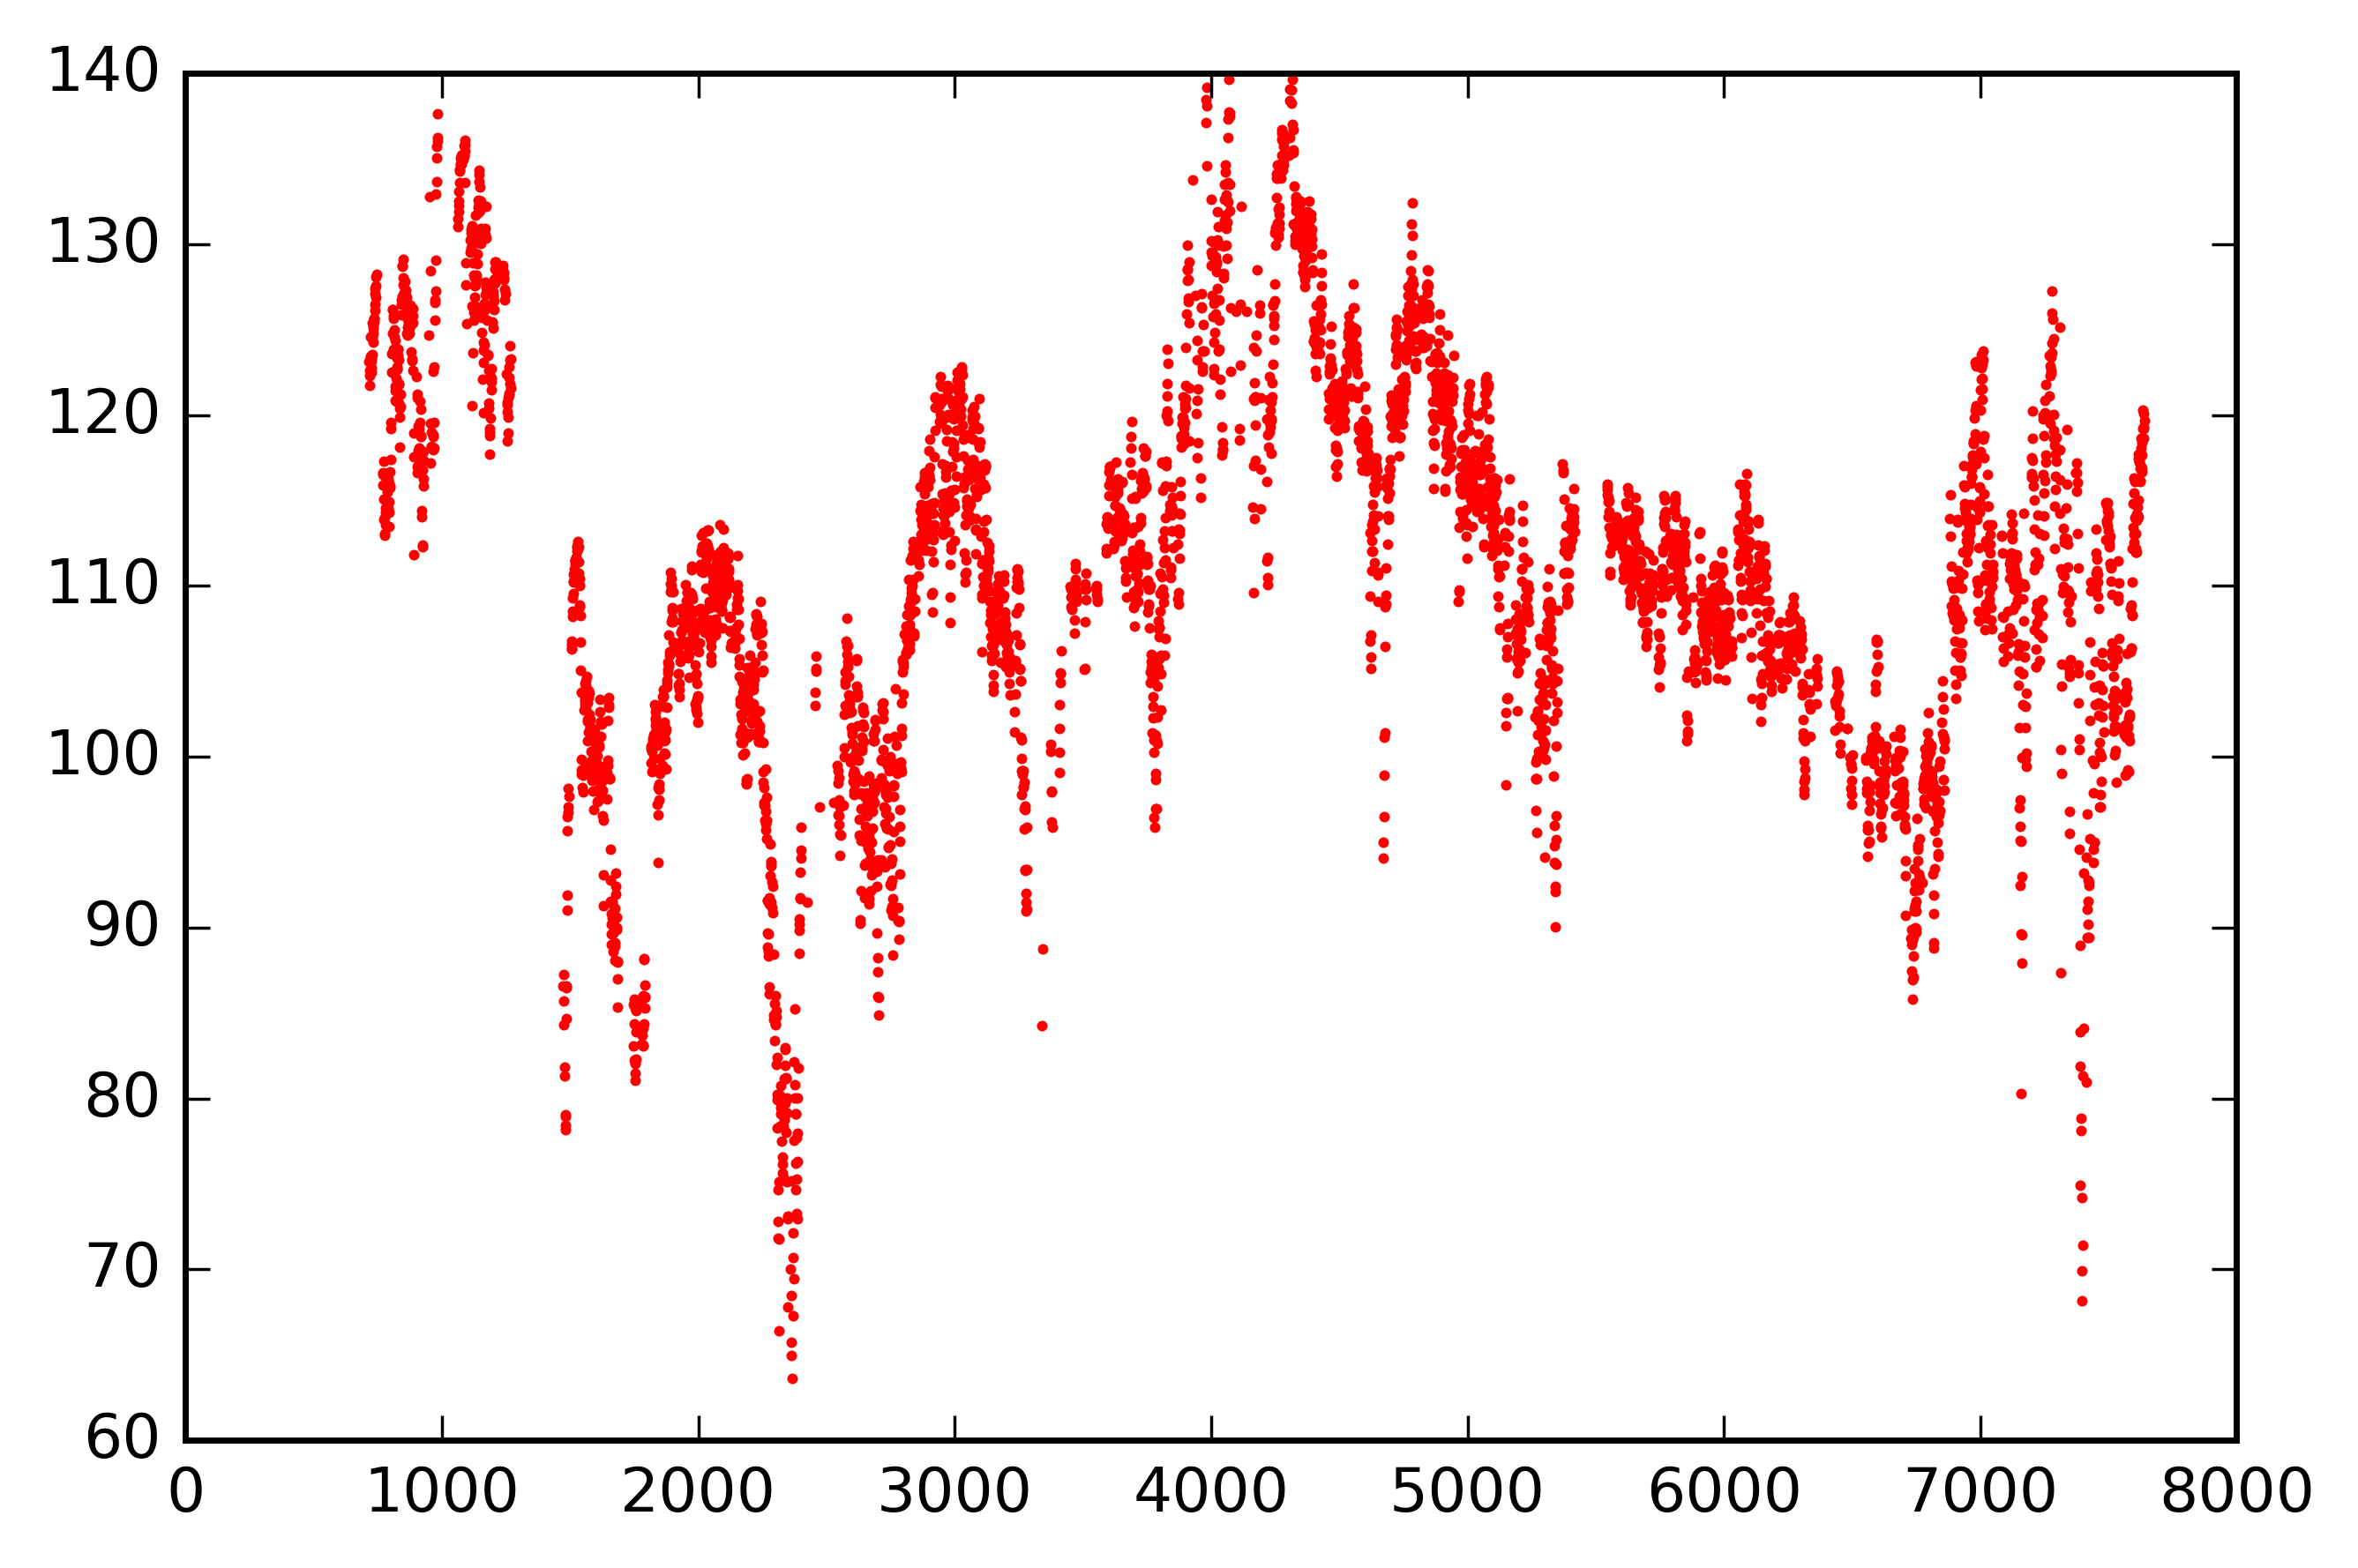

In [8]:
plt.figure()
plt.scatter(hp['orbit'],hp['hp_alt'],s=3,lw=0,c='r')
plt.ylim(60,140)
plt.show()

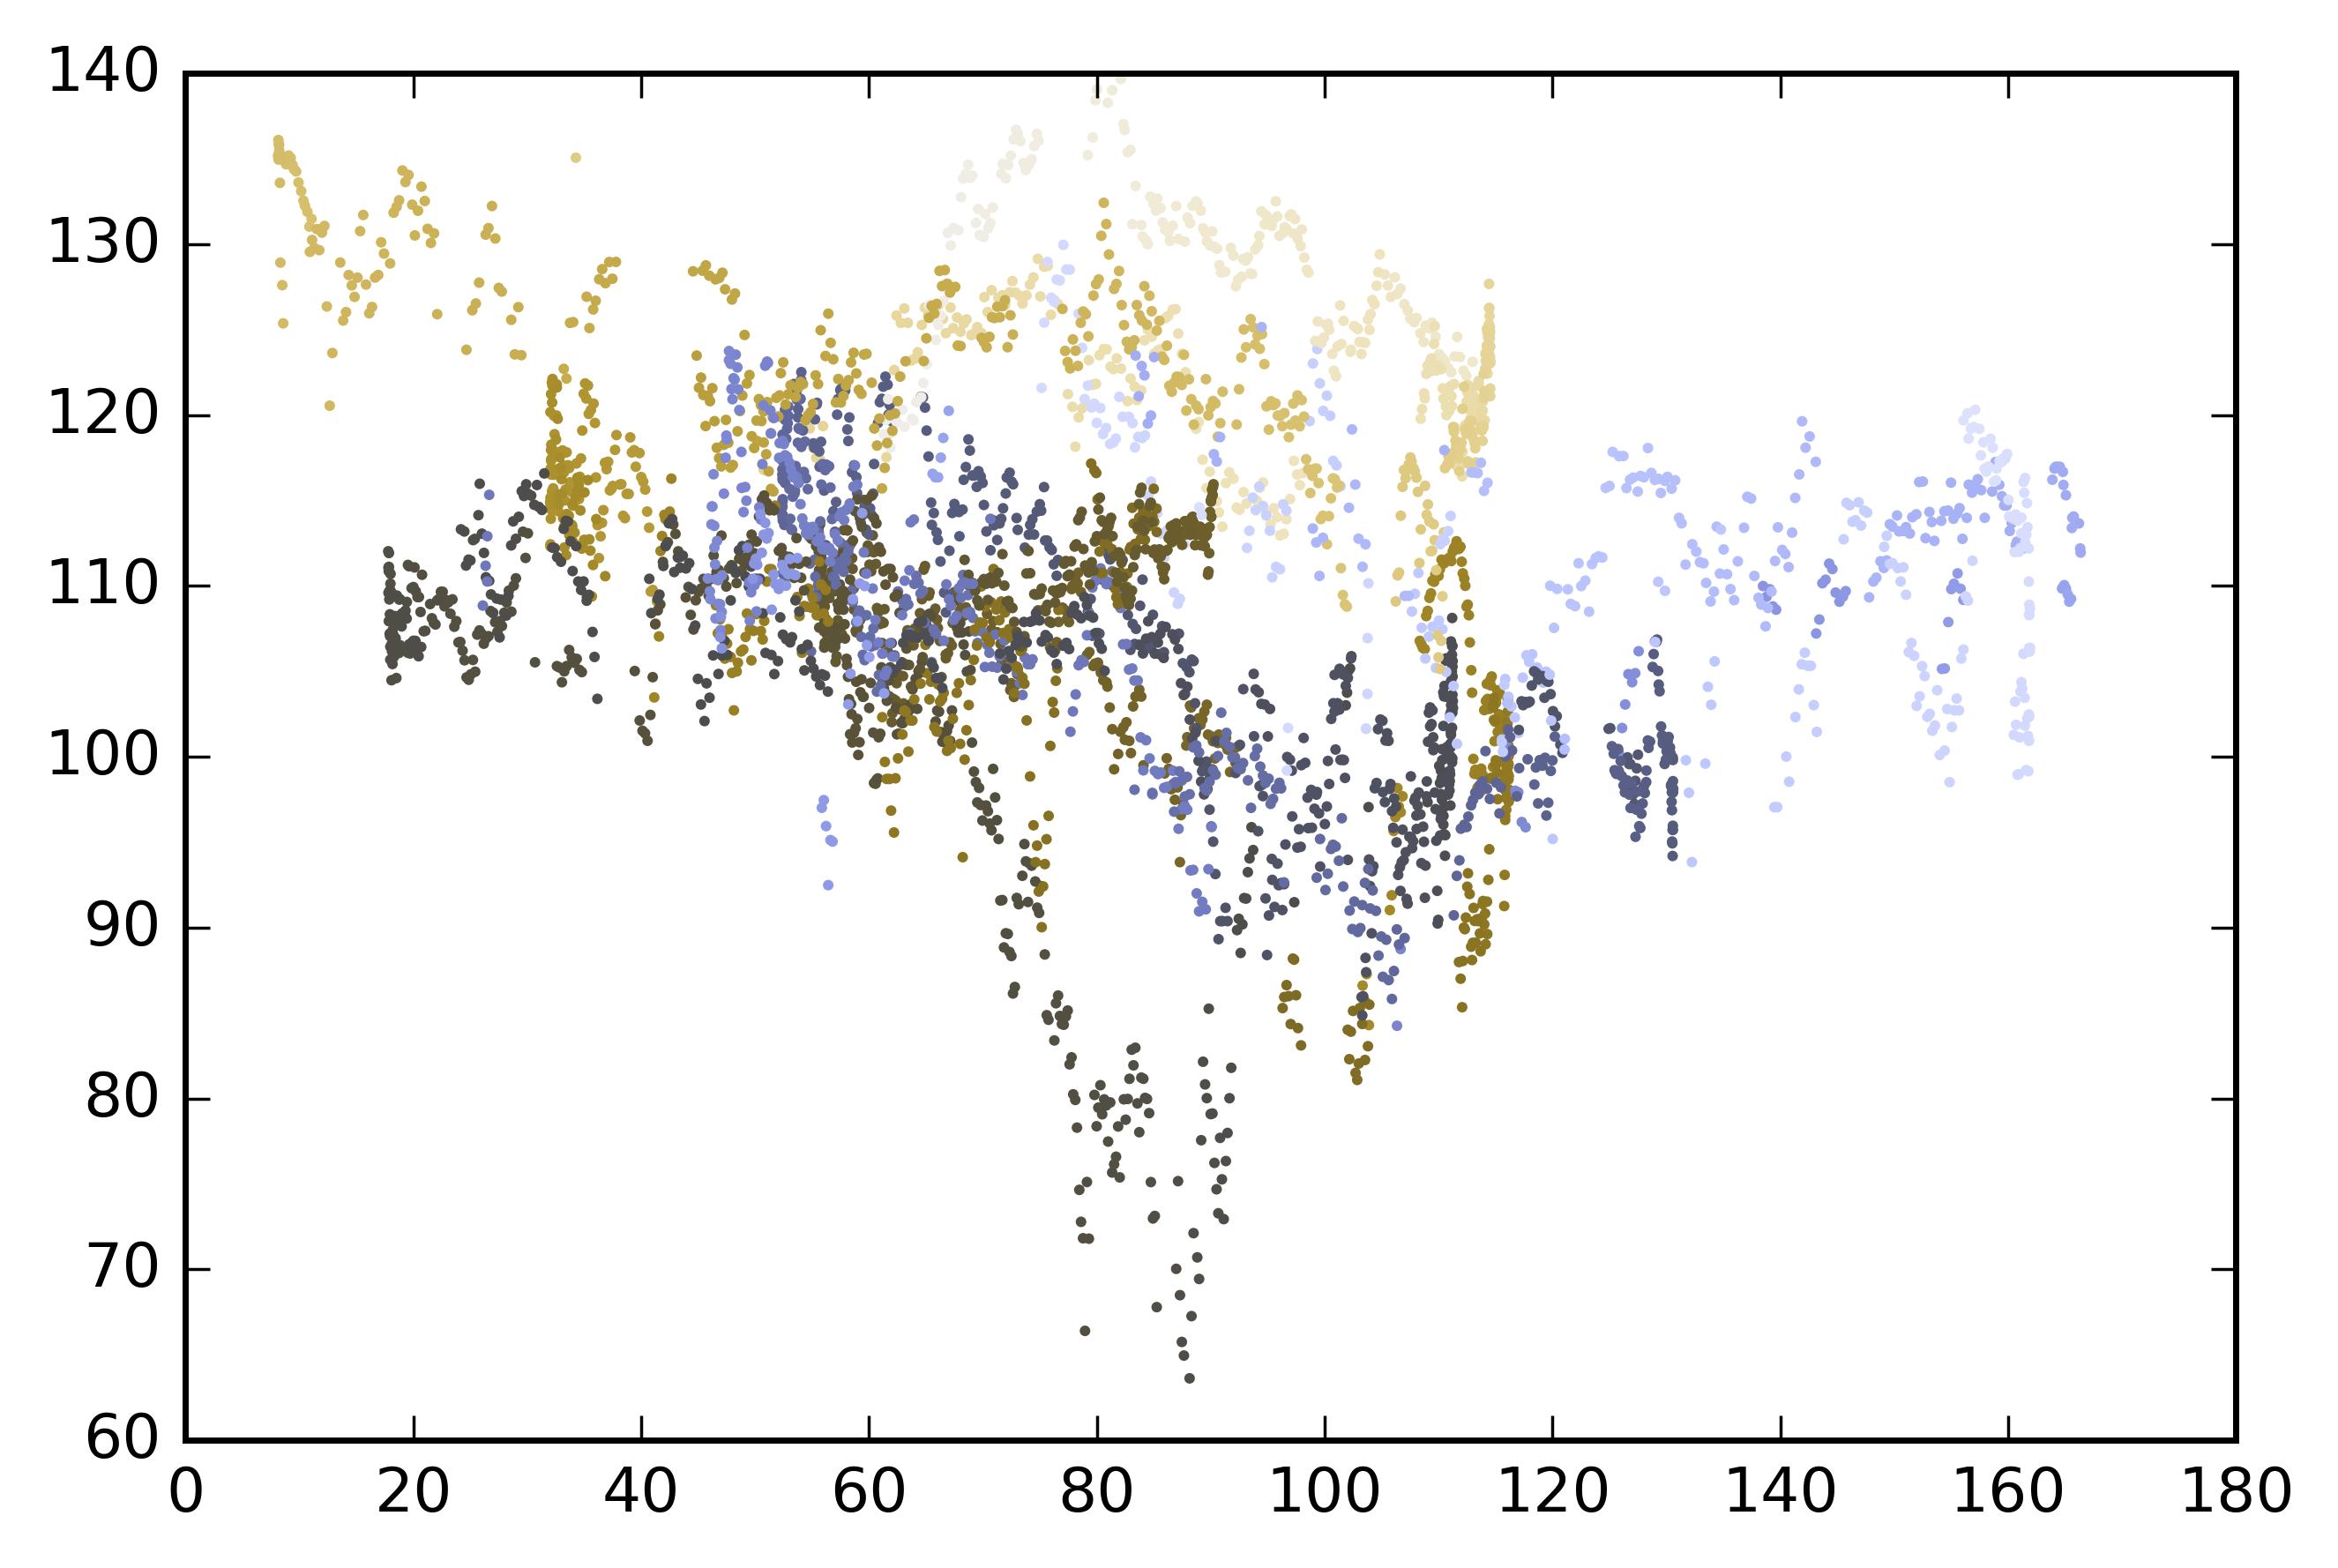

In [198]:
plt.figure()
plt.scatter(hp['sza'],hp['hp_alt'],s=3,lw=0,c=hp['Ls'],cmap=cyclic,norm=LscNorm)
plt.ylim(60,140)

plt.show()

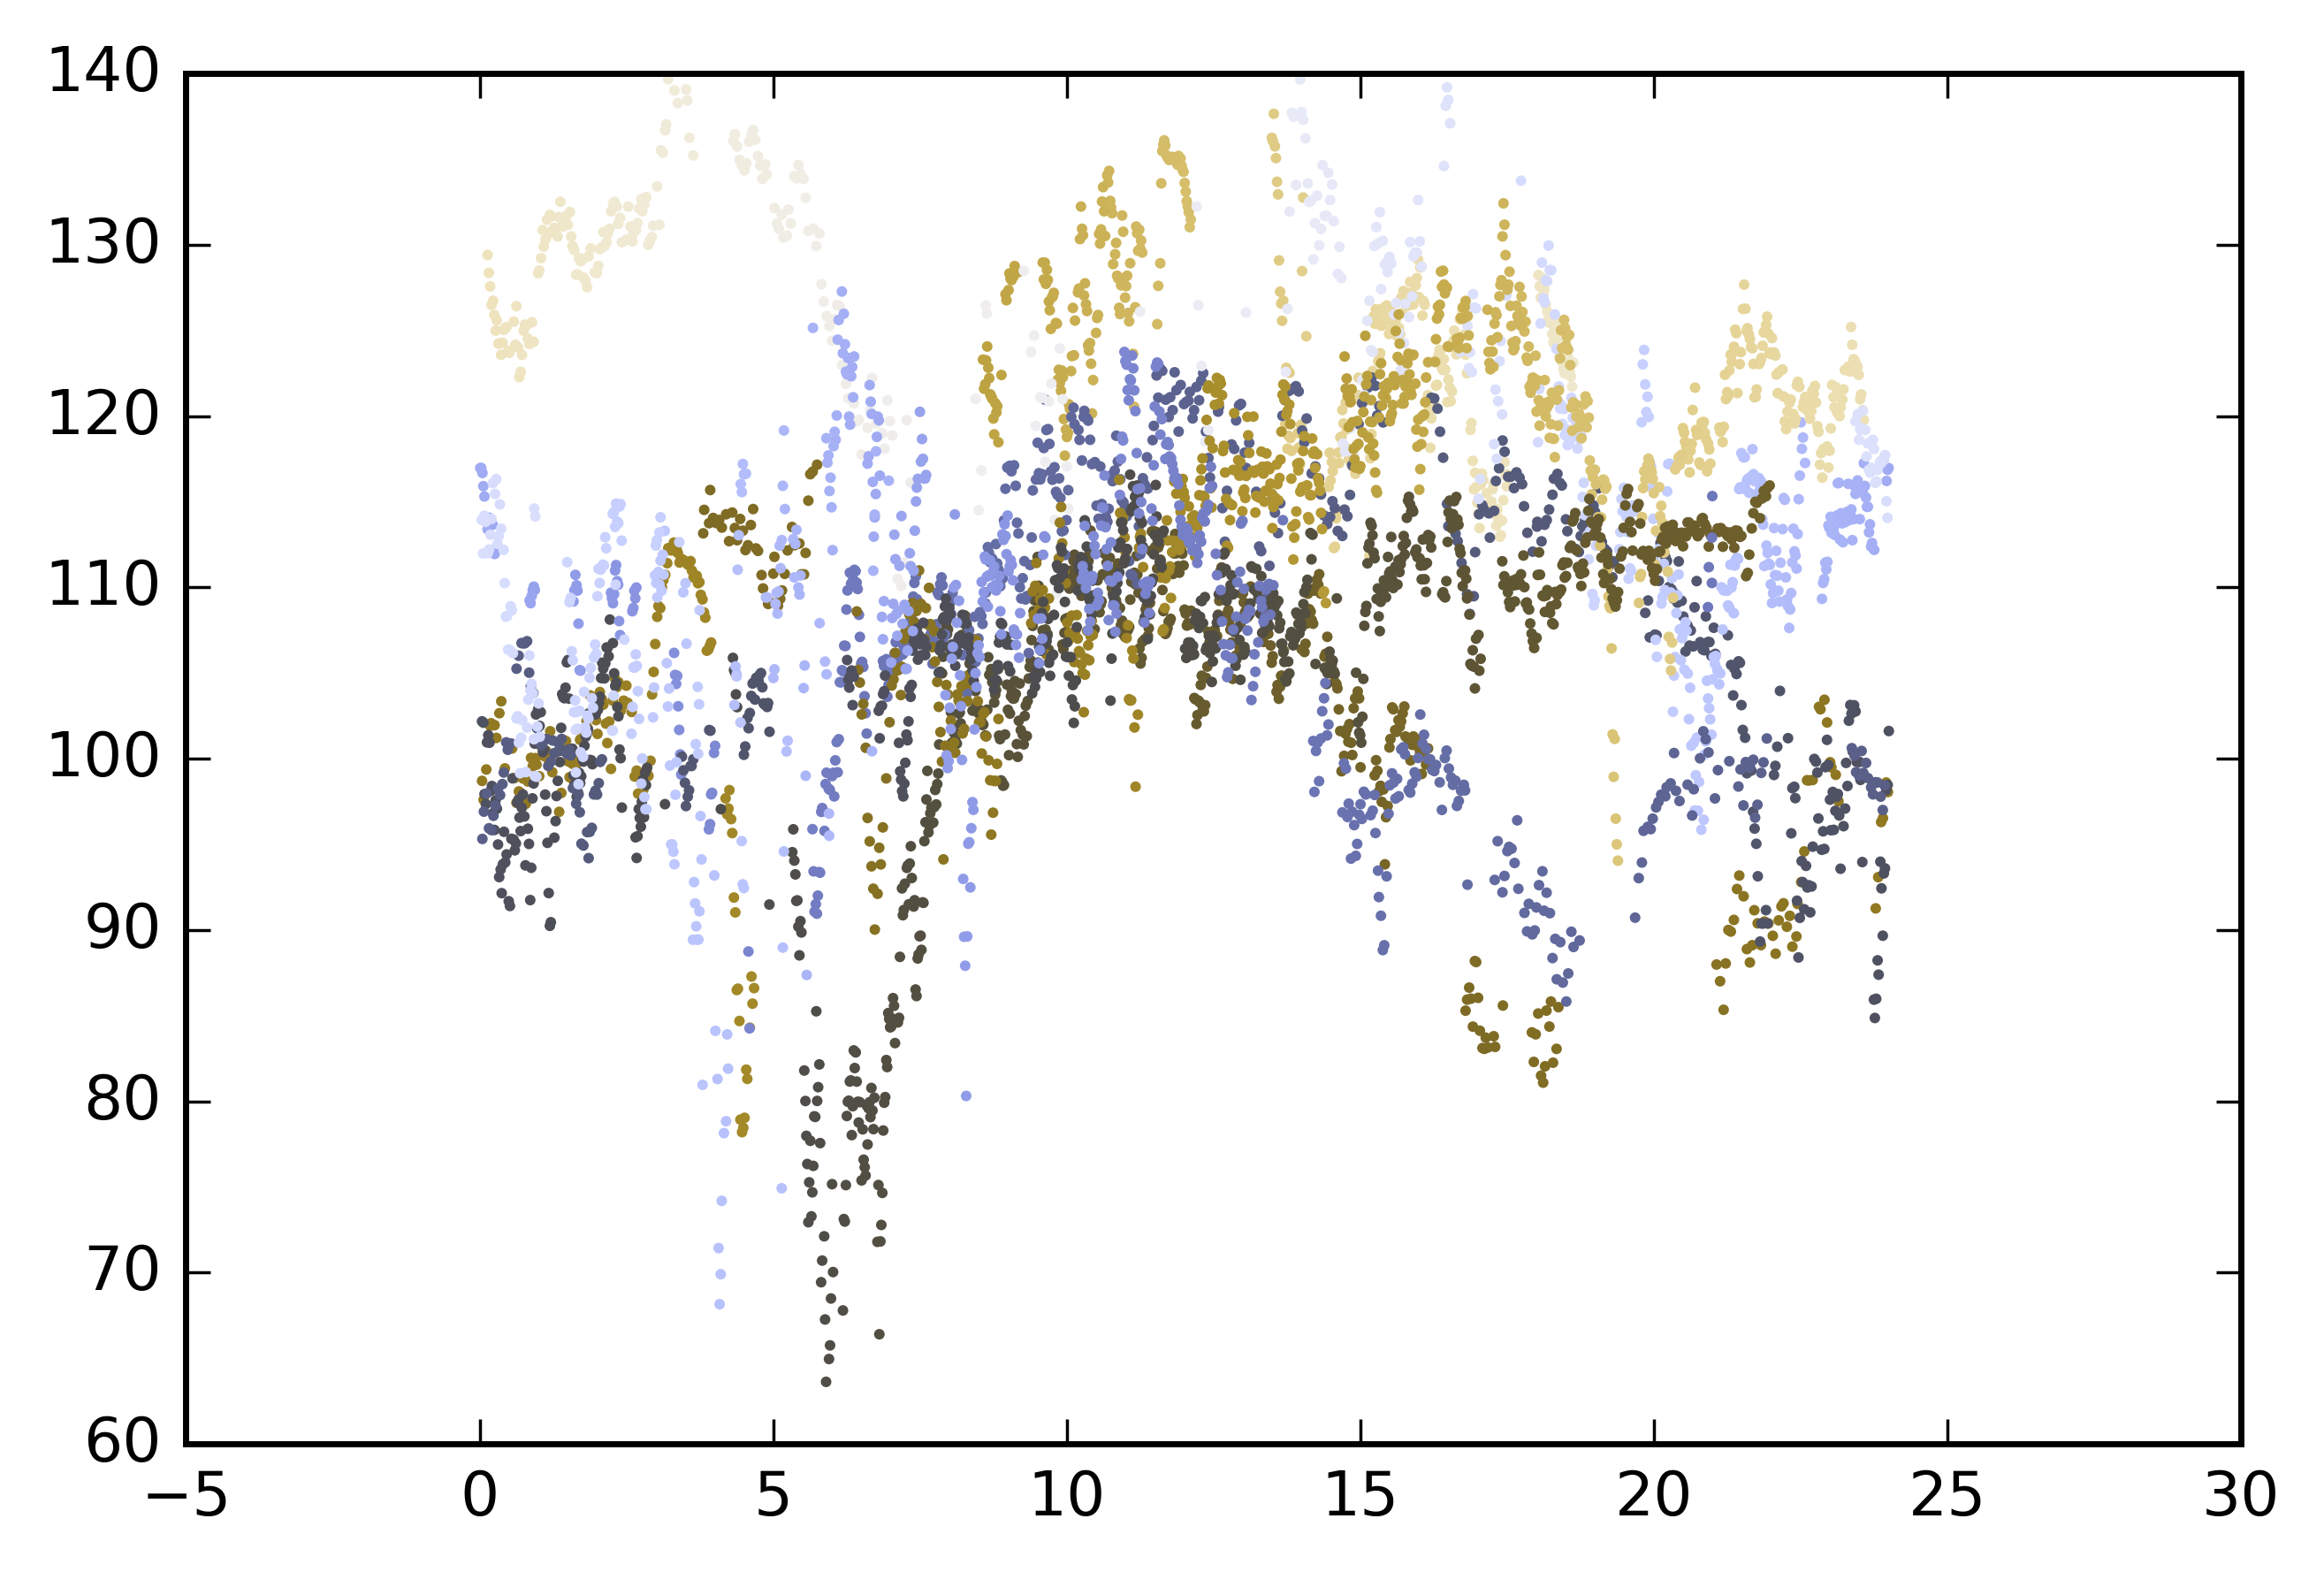

In [91]:
plt.figure()
plt.scatter(hp['lst'],hp['hp_alt'],s=3,lw=0,c=hp['Ls'],cmap=cyclic,norm=LscNorm)
plt.ylim(60,140)
plt.show()

In [203]:
latbins = np.linspace(-90,90,8)
latbin_mids = (latbins[:-1]+latbins[1:])/2
hp['lat_bin'] = pd.cut(hp['lat'],latbins,labels=latbin_mids)
lat_bin = hp.drop('lat',axis=1).groupby('lat_bin').mean().reset_index()

lat_bin     slope  intercept    rvalue         pvalue    stderr  \
0 -77.142857  0.029747  -2.898439  0.911504  1.479734e-182  0.000388   
1 -51.428571  0.028444  -3.045414  0.916219  2.017426e-177  0.000359   
2 -25.714286  0.028443  -2.970053  0.895991  1.691740e-164  0.000416   
3   0.000000  0.026070  -2.643032  0.901253  6.064827e-109  0.000377   
4  25.714286  0.025151  -2.563734  0.905277  3.346058e-123  0.000360   
5  51.428571  0.027357  -2.733081  0.898641  1.526027e-205  0.000385   
6  77.142857  0.025986  -2.696863  0.901797  3.500631e-120  0.000383   

       hp_alt        orbit      count          Ls      ...       precision_CO  \
0  103.985267  4319.512881  10.187354  123.783909      ...           0.000196   
1  113.770617  4153.332198  10.207836  162.170401      ...           0.000177   
2  112.421521  3984.438881  10.282769  189.339491      ...          -7.356193   
3  109.836003  4057.289517  10.111481  188.873705      ...           0.000218   
4  111.828951  4509.020443  10.156729  184.735066      ...          -1.701663   
5  107.305157  4157.411411  10.351351  108.753435      ...          -2.999804   
6  112.206765  4116.886905  10.229167  101.600568      ...         -59.464095   

   precision_CO2  precision_He  precision_N2  precision_O         sza  \
0       0.000072      0.020839      0.001460     0.000448  104.675880   
1       0.000060      0.025556      0.001404     0.000455   84.417453   
2      -7.356328      0.028368     -7.354812    -7.355908   82.975399   
3       0.000080      0.032723      0.001636     0.000541   66.647925   
4      -1.701798      0.032340     -1.700236    -1.701348   72.486519   
5      -2.999926      0.028693     -2.998559    -2.999565   83.653291   
6     -59.464216      0.032542    -59.462843   -59.463830   75.235072   

     t_sclk_cor        t_tid        t_unix           tid  
0  5.353581e+08  5401.121143  1.482086e+09  22139.025761  
1  5.326743e+08  5397.745997  1.479402e+09  21806.664395  
2  5.299348e+08  5398.469553  1.476663e+09  21468.877761  
3  5.311859e+08  5403.898527  1.477914e+09  21614.579035  
4  5.385464e+08  5402.569515  1.485274e+09  22518.040886  
5  5.328367e+08  5399.174987  1.479565e+09  21814.822823  
6  5.321766e+08  5330.061574  1.478905e+09  21733.773810  

[7 rows x 42 columns]

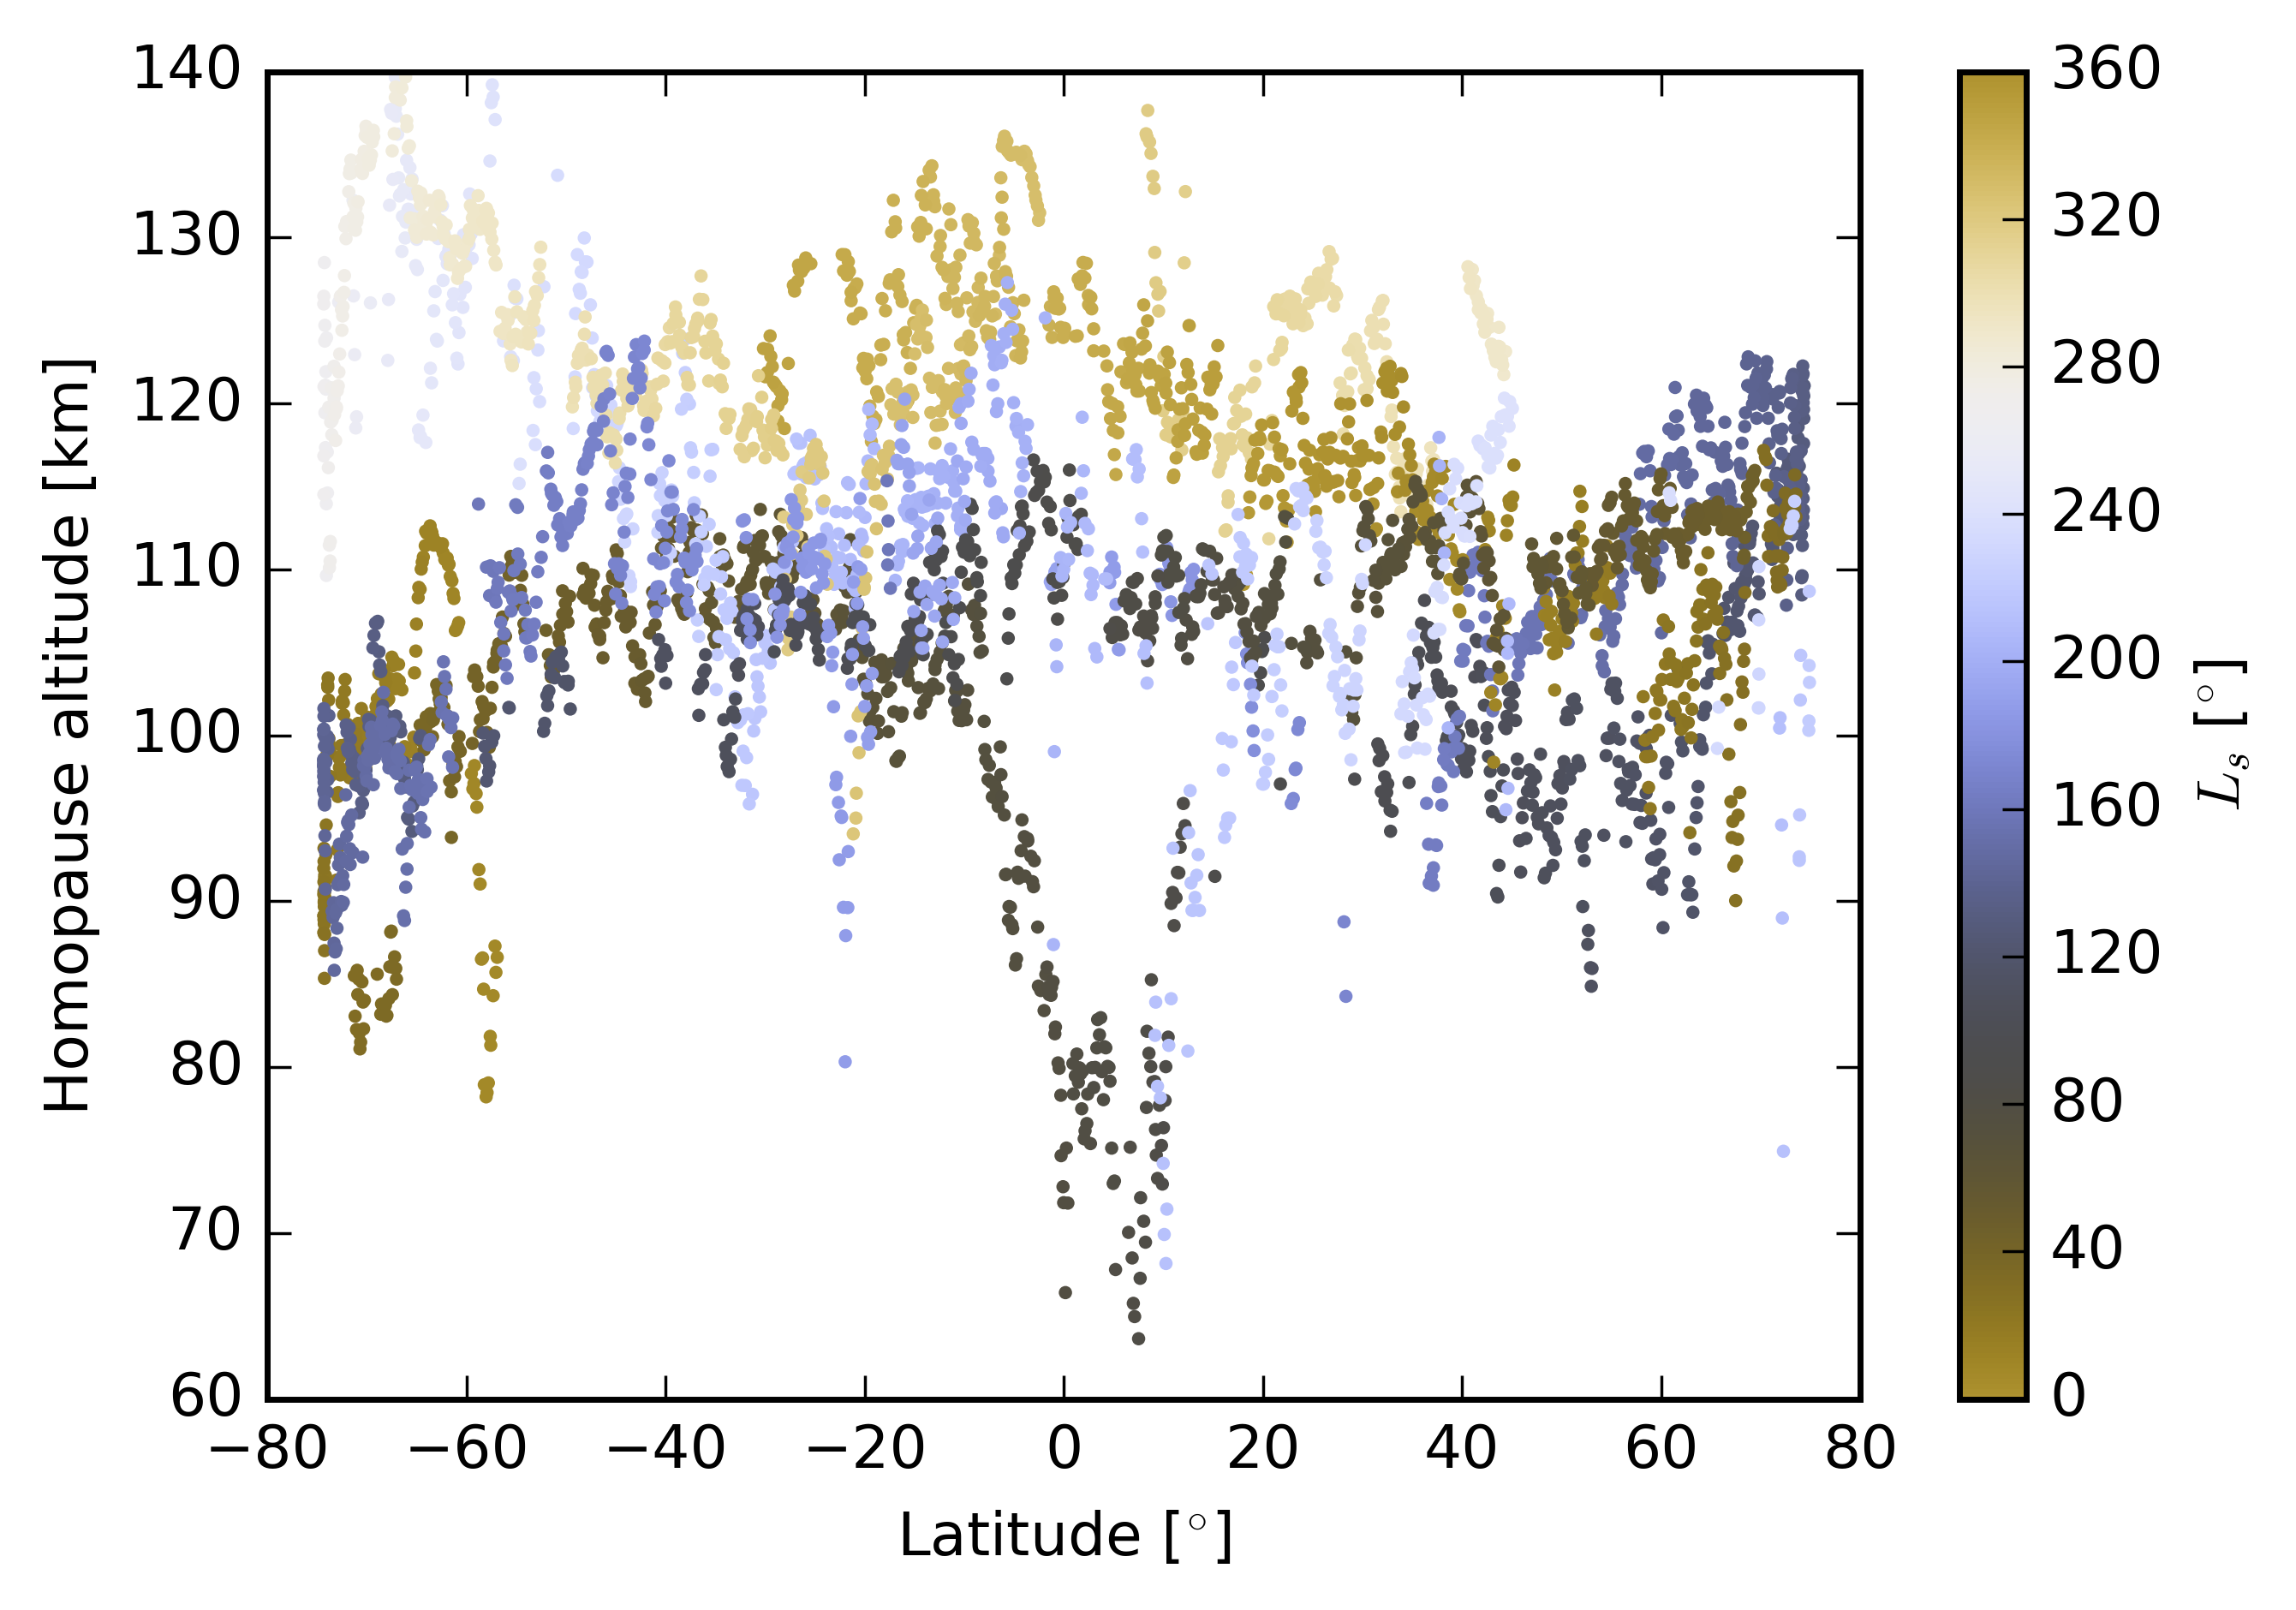

In [264]:
plt.figure()
cax = plt.scatter(hp['lat'],hp['hp_alt'],s=5,lw=0,c=hp['Ls'],cmap=cyclic,norm=LscNorm)
#plt.plot(lat_bin['lat_bin'],lat_bin['hp_alt'],c='k',lw=2,ls='--')
plt.ylim(60,140)
plt.xlim(-80,80)

plt.xlabel(r'Latitude [$^{\circ}$]')
plt.ylabel('Homopause altitude [km]')
plt.colorbar(cax,label=r'$L_s$ [$^{\circ}$]')

plt.show()

In [210]:
Lsbins = np.linspace(0,360,16)
Lsbin_mids = (Lsbins[:-1]+Lsbins[1:])/2
Lsb = pd.cut(hp['Ls'],Lsbins,labels=Lsbin_mids)
Ls_bin = hp.drop('Ls',axis=1).groupby(Lsb).mean().reset_index()
Ls = list(Ls_bin['Ls'])
Ls_alt = list(Ls_bin['hp_alt'])
Ls_std = hp['hp_alt'].groupby(Lsb).std().reset_index()['hp_alt']

0      8.576145
1      9.524356
2      3.564772
3     13.459130
4      5.134383
5      8.615077
6      8.118191
7      7.518867
8     10.632346
9      9.104404
10    12.436479
11    13.274888
12     4.197308
13     8.139207
14     4.687678
Name: hp_alt, dtype: float64

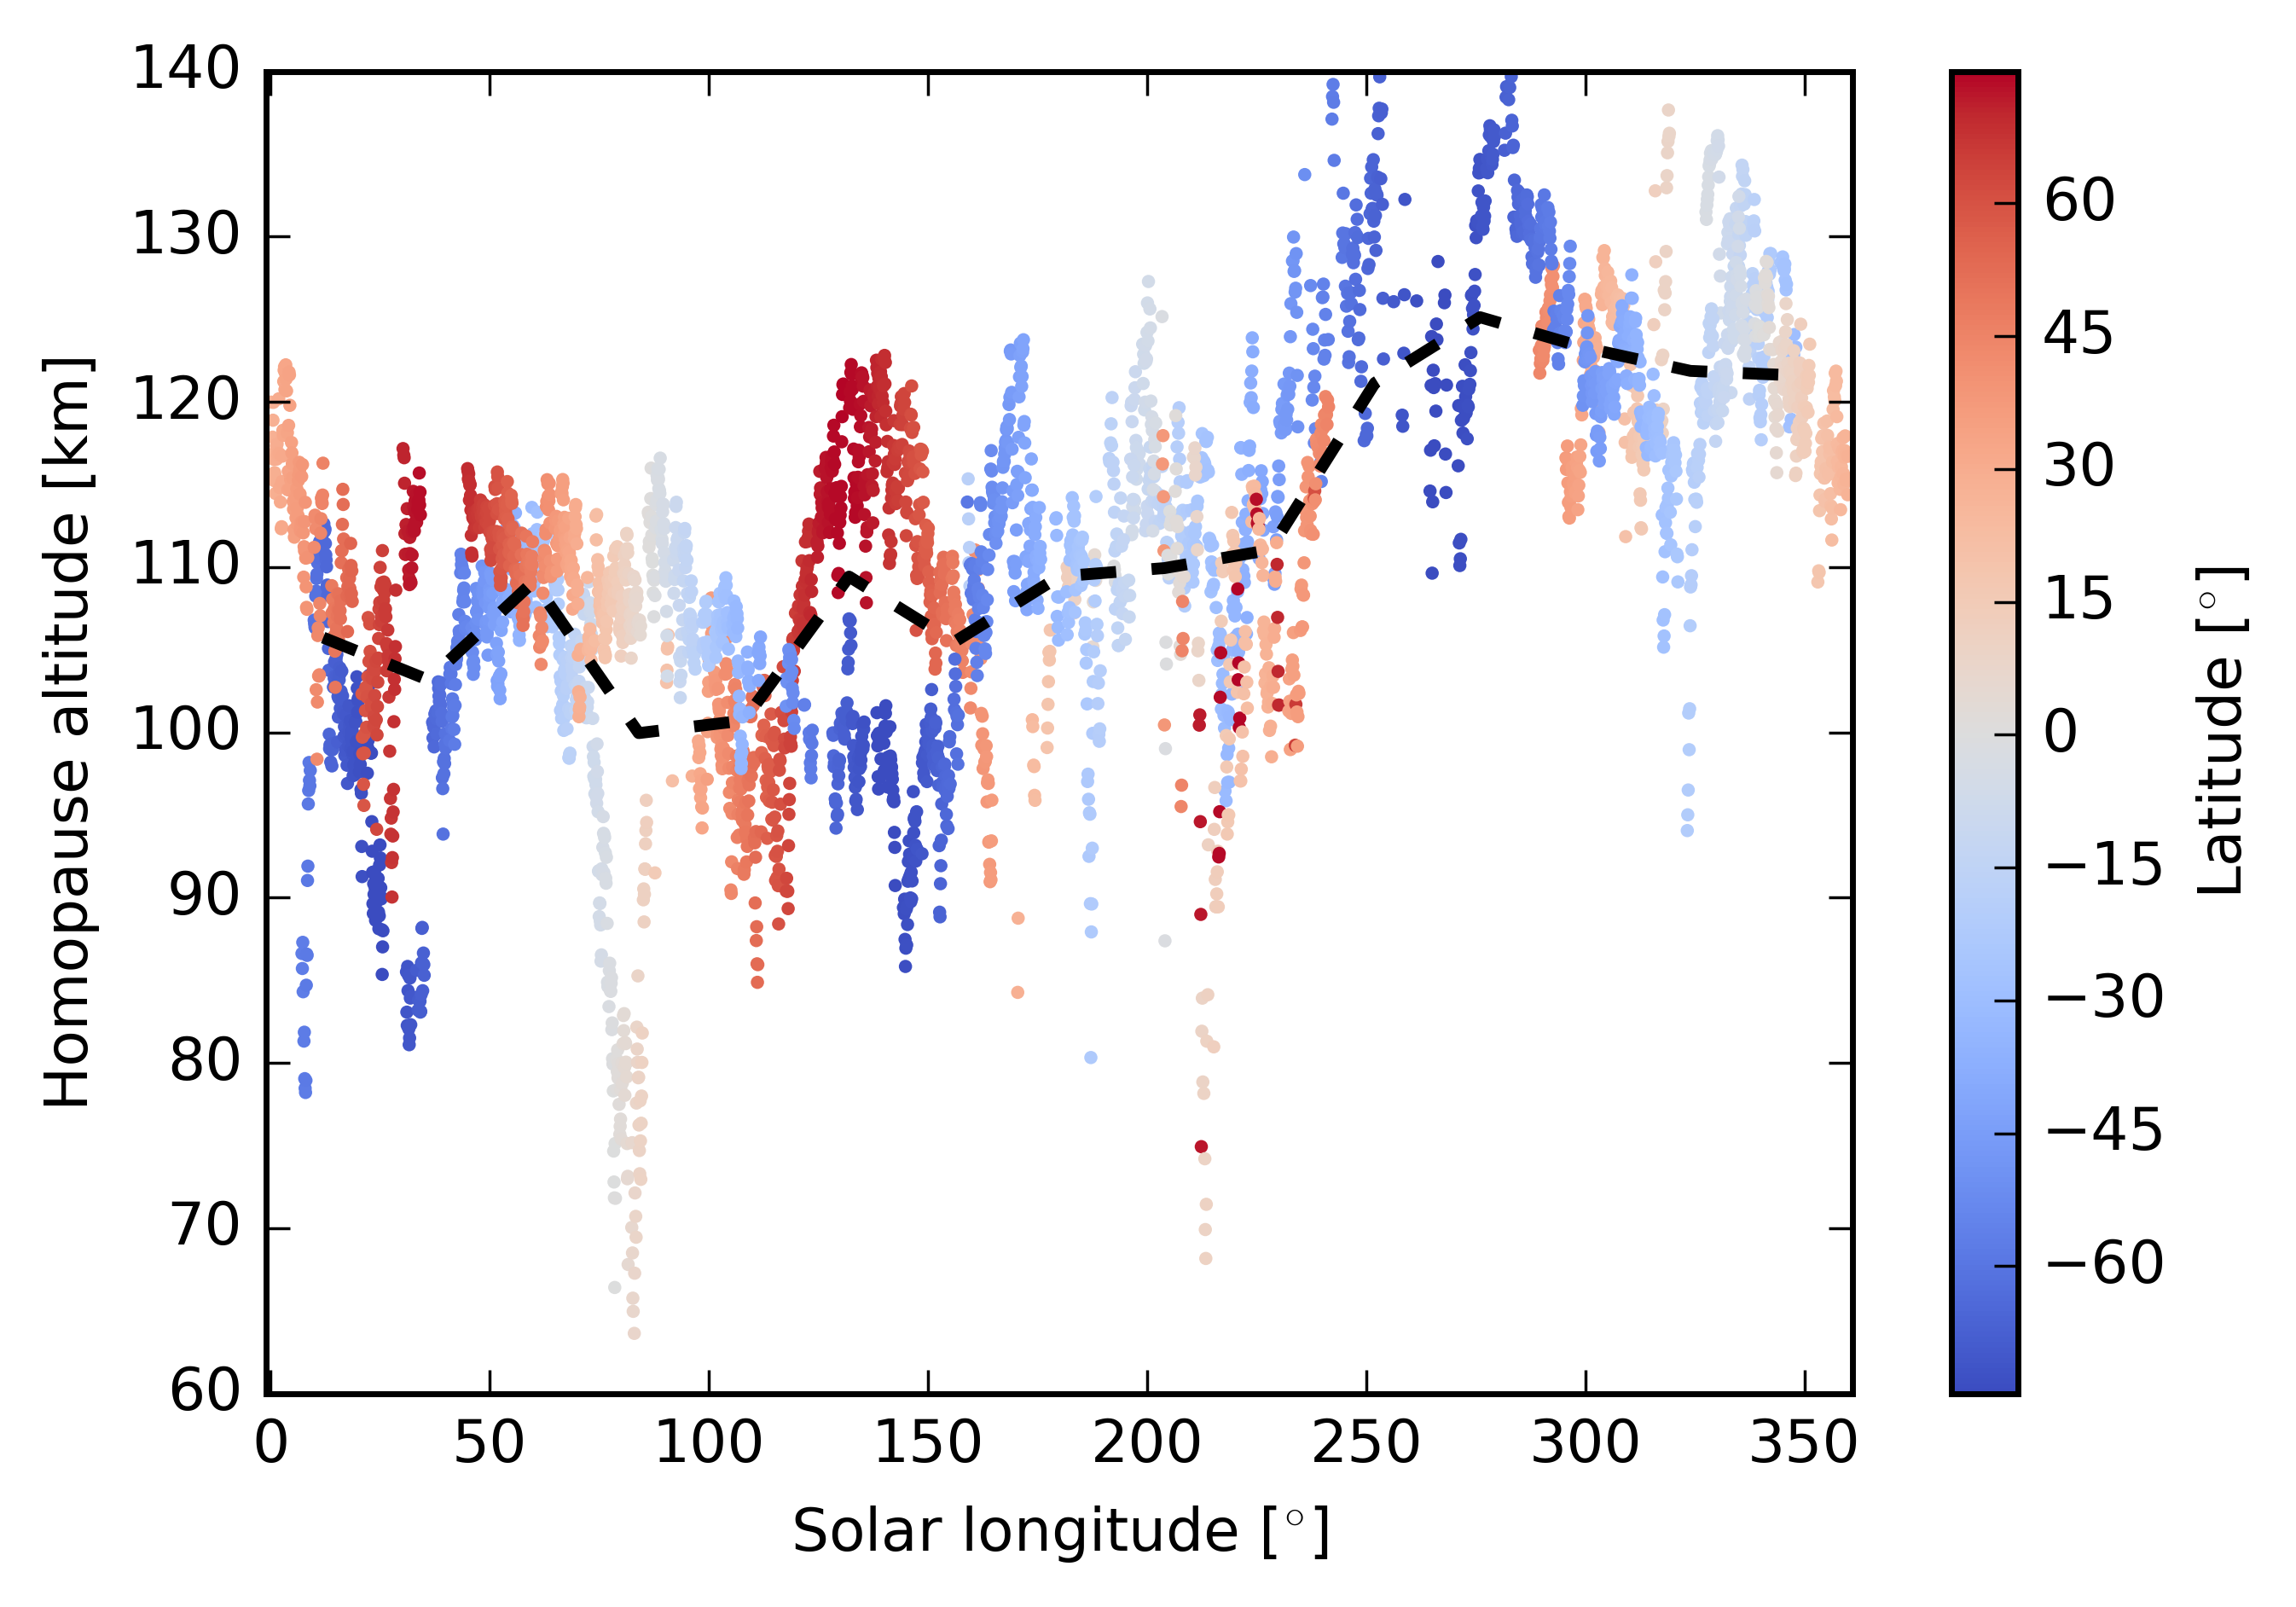

In [262]:
plt.figure()
cax = plt.scatter(hp['Ls'],hp['hp_alt'],s=5,lw=0,c=hp['lat'],cmap='coolwarm')
#plt.scatter(hp['Ls'][hp['lat']>0],hp['hp_alt'][hp['lat']>0],s=5,lw=0,c='r')
#plt.scatter(hp['Ls'][hp['lat']<0],hp['hp_alt'][hp['lat']<0],s=5,lw=0,c='b')

plt.plot(Ls,Ls_alt,c='k',lw=2,ls='--')
plt.ylim(60,140)
plt.xlim(-1,361)
plt.xlabel(r'Solar longitude [$^{\circ}$]')
plt.ylabel('Homopause altitude [km]')
plt.colorbar(cax,label=r'Latitude [$^{\circ}$]')

plt.show()

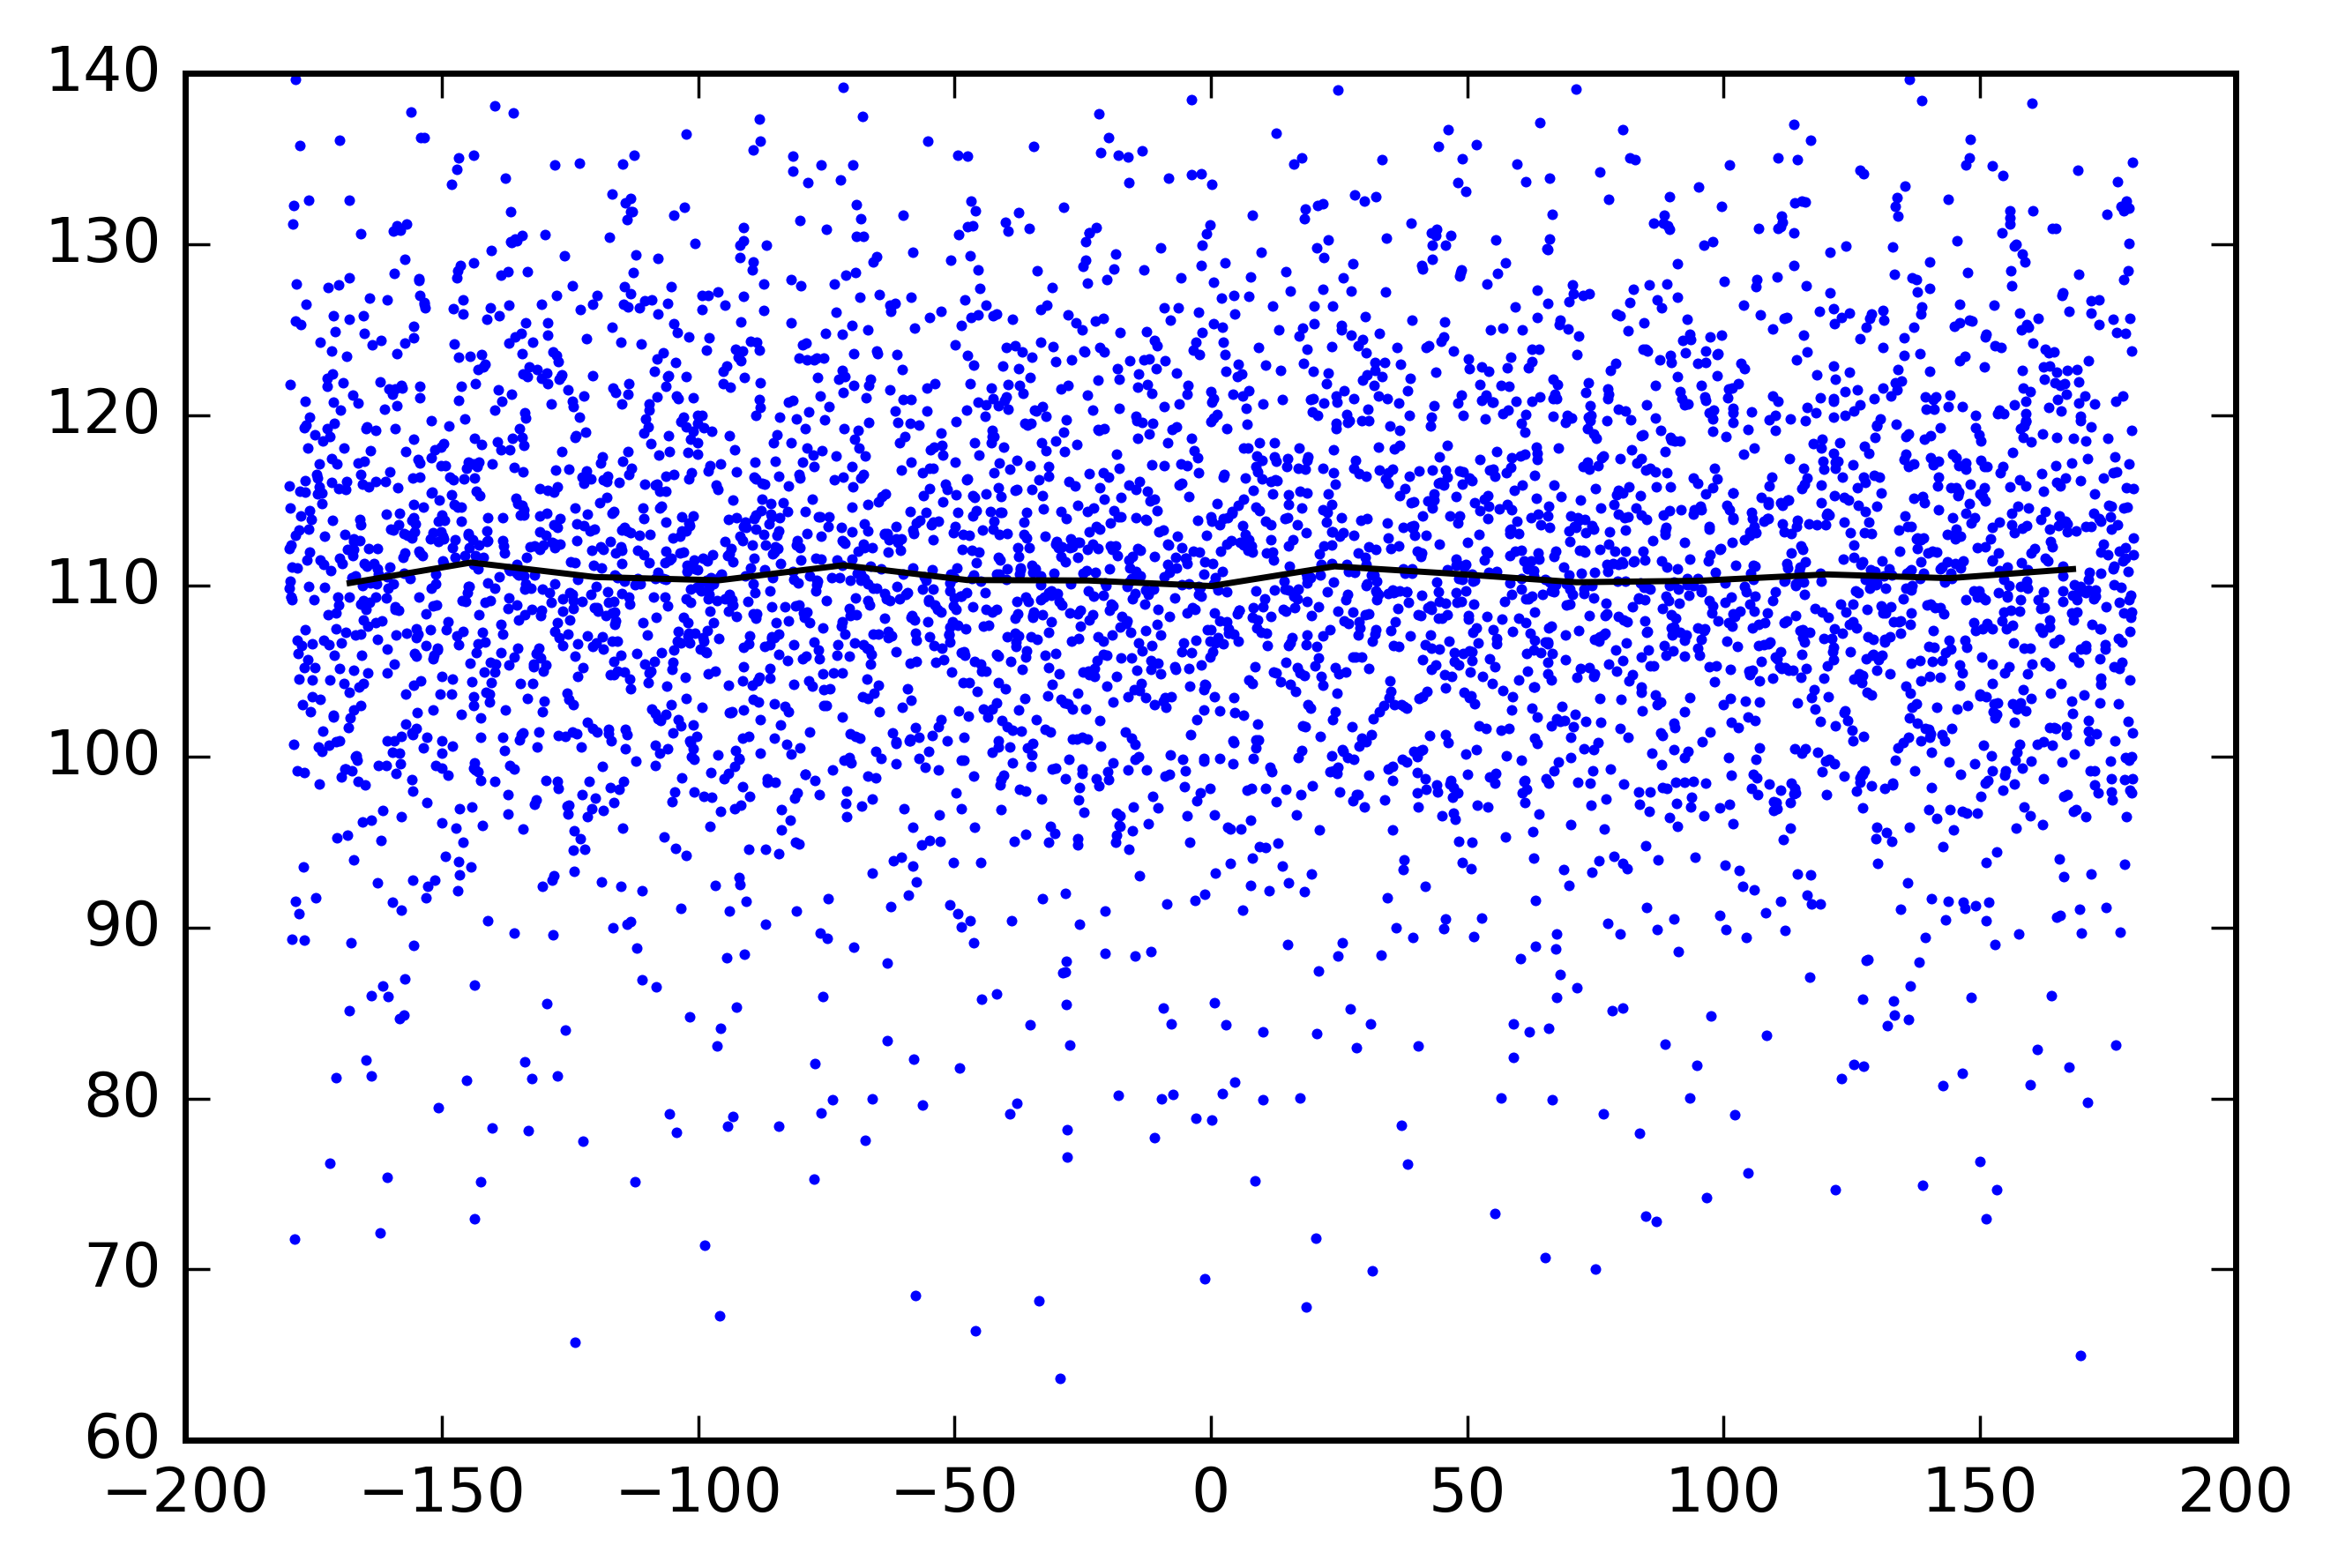

In [81]:
plt.figure()
plt.scatter(hp['long'],hp['hp_alt'],s=3,lw=0)
plt.plot(lon_bin['long'],lon_bin['hp_alt'],'k-')
plt.ylim(60,140)
plt.show()

In [122]:
bins = np.linspace(-180,180,16)
bin_mids = (bins[:-1]+bins[1:])/2
lonb = pd.cut(hp['long'],bins,labels=bin_mids)
lon_bin = hp.groupby(lonb).mean().reset_index()

ValueError: cannot insert long, already exists

In [102]:
hp.tail()

slope  intercept    rvalue  pvalue    stderr      hp_alt  orbit  \
5558  0.031319  -3.513266  0.949873     0.0  0.000312  119.302441   7636   
5559  0.031298  -3.508046  0.949831     0.0  0.000312  119.213590   7637   
5560  0.031295  -3.489204  0.940768     0.0  0.000342  118.623657   7638   
5561  0.032255  -3.651115  0.948111     0.0  0.000328  120.111789   7639   
5562  0.031507  -3.548042  0.943905     0.0  0.000335  119.694853   7641   

      count          Ls  abundance_Ar  ...    quality_CO2  quality_He  \
5558      9  240.836625  1.550635e+08  ...             OU          OV   
5559      9  240.953124  3.594992e+07  ...             OU          OV   
5560      9  241.069609  7.600304e+07  ...             IV          IV   
5561      9  241.186123  5.746181e+07  ...             OU          OV   
5562      9  241.419106  8.351983e+07  ...             OU          OV   

      quality_N2  quality_O       sza    t_sclk_cor        t_tid  \
5558          OV         OU  156.9805  5.889675e+08  5419.474298   
5559          OV         OU  156.7213  5.889834e+08  5418.684298   
5560          IV         IV  156.5245  5.889993e+08  5417.994297   
5561          OV         OU  156.4263  5.890152e+08  5418.474297   
5562          OV         OU  156.0715  5.890469e+08  5419.564298   

            t_unix                t_utc    tid  
5558  1.535696e+09  2018-08-31T06:06:04  28772  
5559  1.535711e+09  2018-08-31T10:31:05  28774  
5560  1.535727e+09  2018-08-31T14:56:03  28776  
5561  1.535743e+09  2018-08-31T19:21:04  28778  
5562  1.535775e+09  2018-09-01T04:10:57  28782  

[5 rows x 55 columns]

In [230]:
hp['dt'] = pd.tseries.tools.to_datetime(hp['t_utc'],infer_datetime_format=True)

In [257]:
start = dt.datetime(2015,2,8)
f27 = [start + dt.timedelta(27/2.*x) for x in range(0,100)]

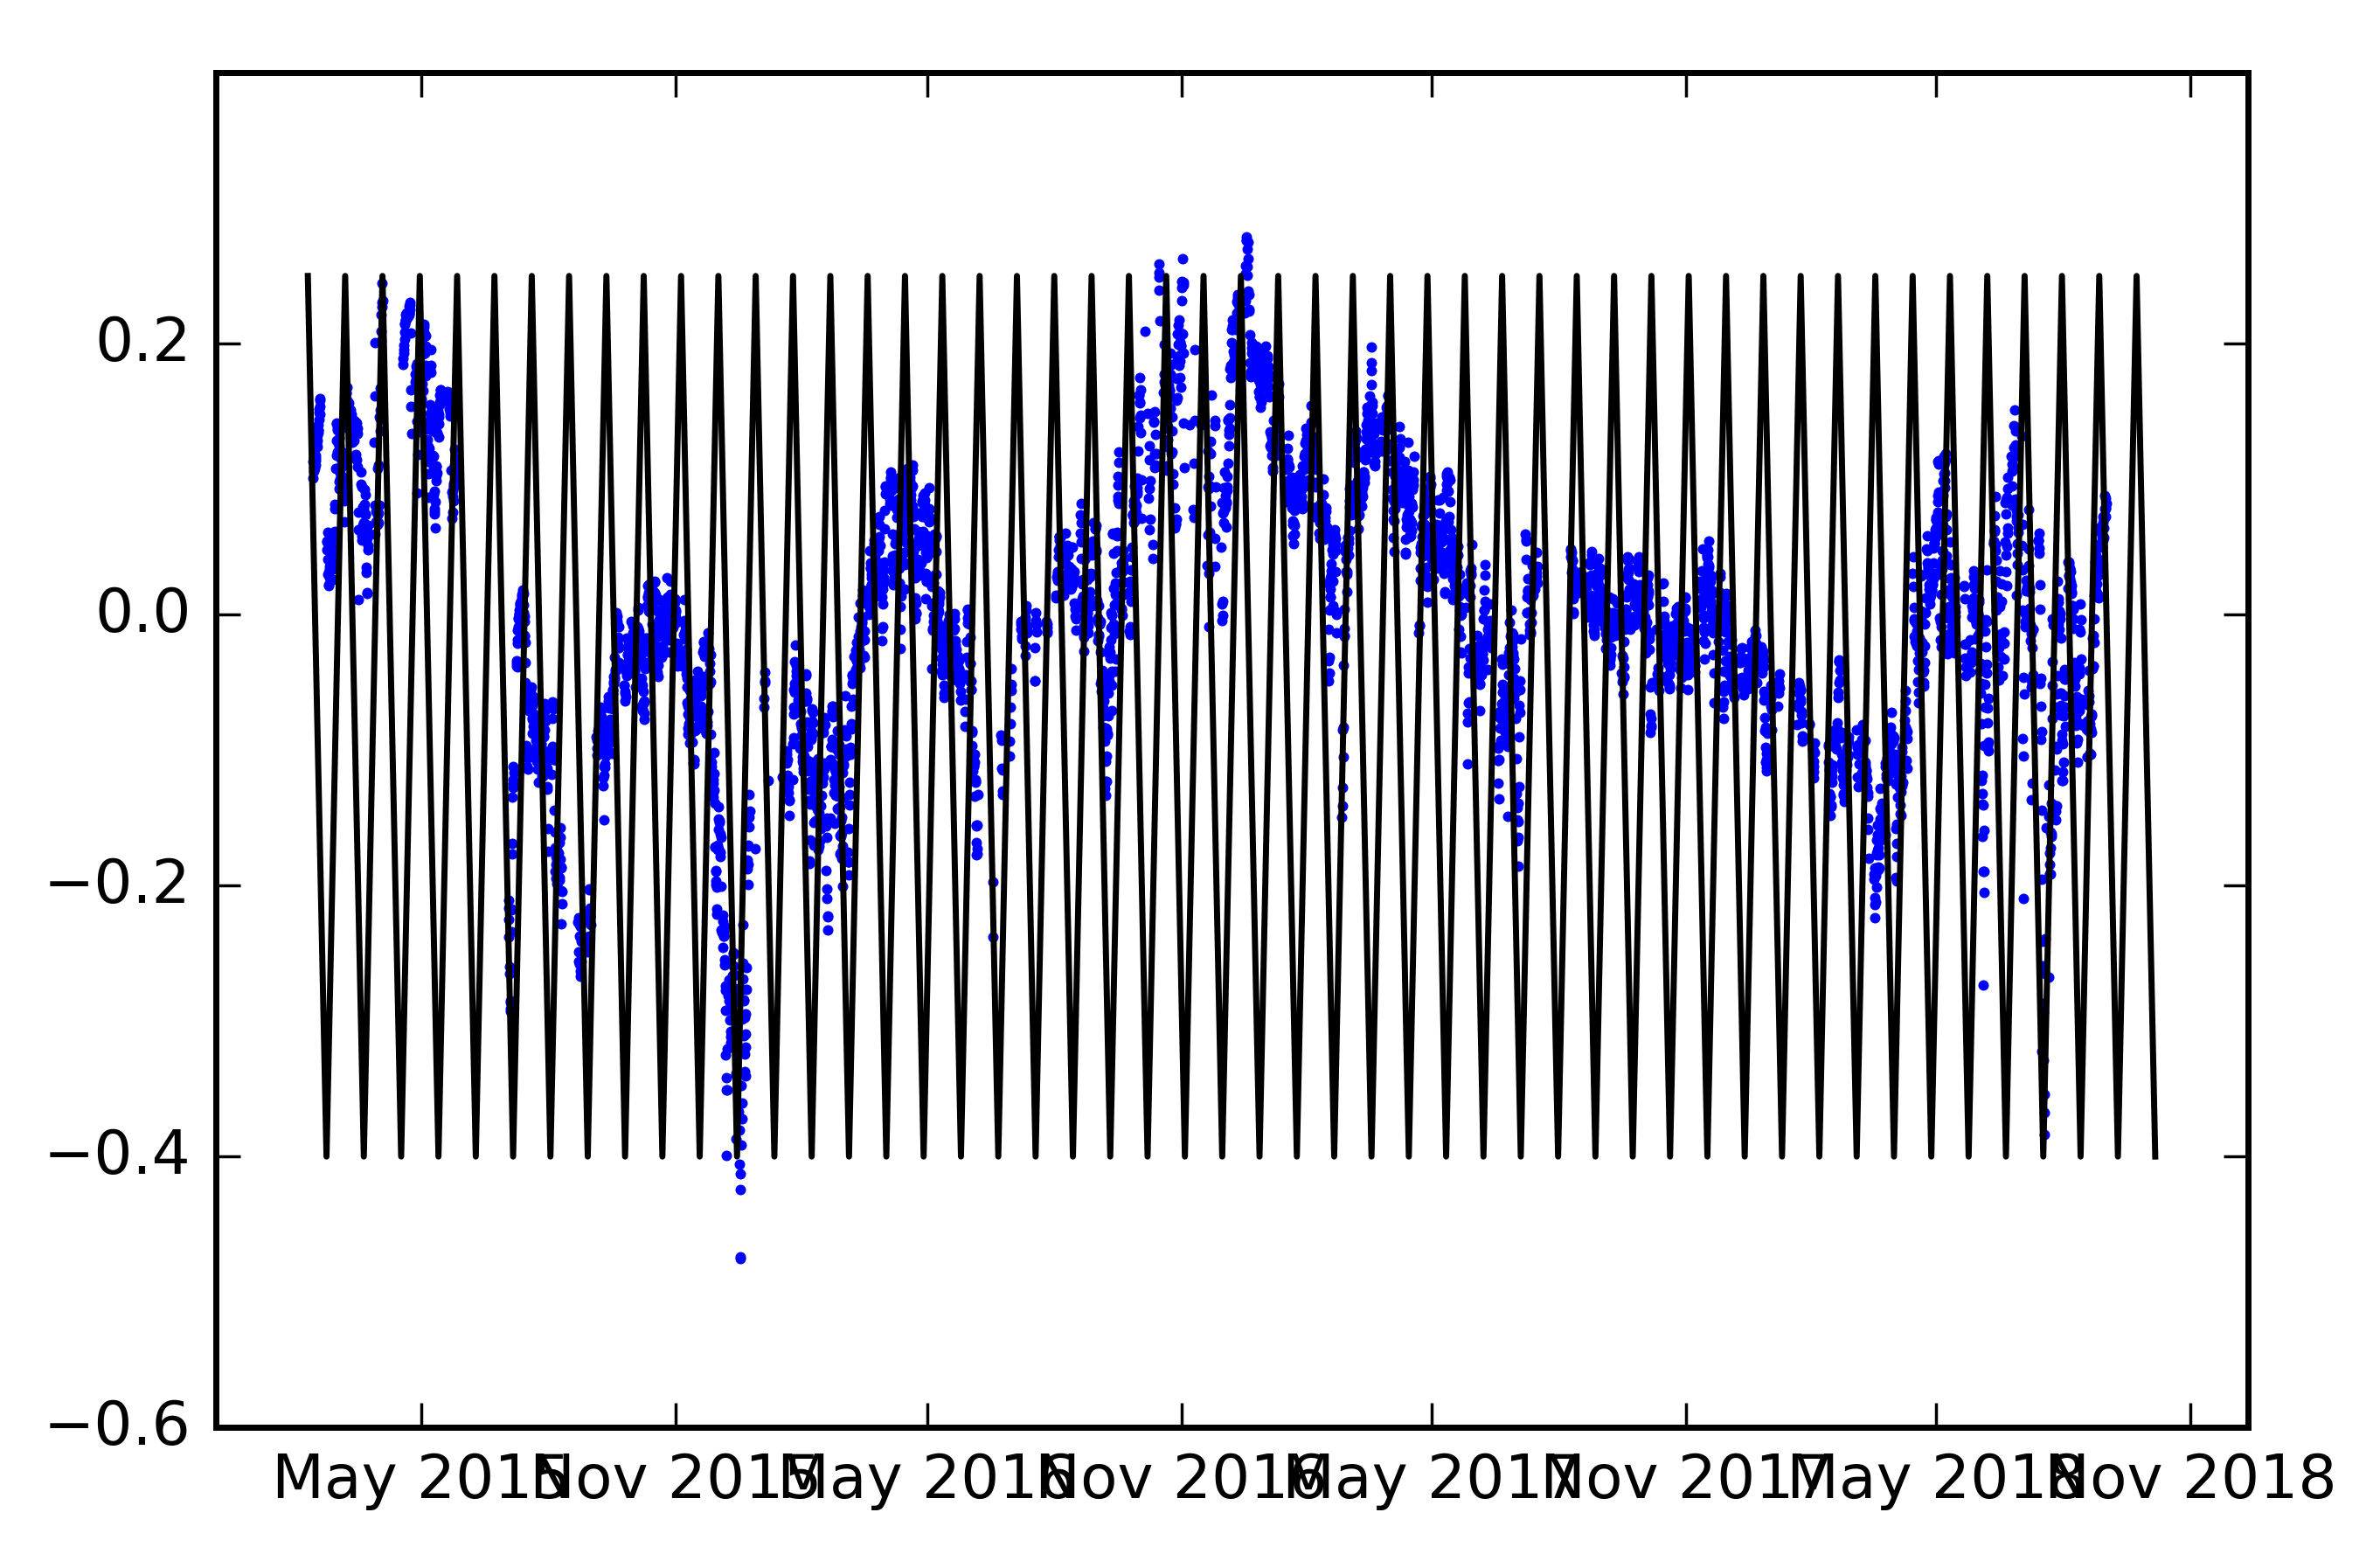

In [258]:
plt.figure()
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.scatter(list(hp['dt']),list((hp['hp_alt']-hp['hp_alt'].mean())/hp['hp_alt'].mean()),s=3,lw=0)
plt.plot(f27,[0.25,-0.4]*(len(f27)/2),'k-')
#plt.gcf().autofmt_xdate()
plt.show()

In [62]:
hp_den = pd.read_csv('../output/psgden/homopause.csv')
hp_den = pd.merge(hp_den,peri,on='orbit')
print(hp_den.columns)
hp_den.head()

Index([u'slope', u'intercept', u'rvalue', u'pvalue', u'stderr', u'hp_den',
       u'orbit', u'count', u'Ls', u'abundance_Ar', u'abundance_CO',
       u'abundance_CO2', u'abundance_He', u'abundance_N2', u'abundance_O',
       u'alt', u'cps_dt_bkd_Ar', u'cps_dt_bkd_CO', u'cps_dt_bkd_CO2',
       u'cps_dt_bkd_He', u'cps_dt_bkd_N2', u'cps_dt_bkd_O', u'focusmode_Ar',
       u'focusmode_CO', u'focusmode_CO2', u'focusmode_He', u'focusmode_N2',
       u'focusmode_O', u'lat', u'long', u'lst', u'mass_Ar', u'mass_CO',
       u'mass_CO2', u'mass_He', u'mass_N2', u'mass_O', u'precision_Ar',
       u'precision_CO', u'precision_CO2', u'precision_He', u'precision_N2',
       u'precision_O', u'quality_Ar', u'quality_CO', u'quality_CO2',
       u'quality_He', u'quality_N2', u'quality_O', u'sza', u't_sclk_cor',
       u't_tid', u't_unix', u't_utc', u'tid'],
      dtype='object')


slope  intercept    rvalue  pvalue    stderr        hp_den  orbit  \
0 -0.237637   6.213495 -0.990569     0.0  0.001054  8.865611e+10    713   
1 -0.235711   6.163311 -0.990409     0.0  0.000973  8.803760e+10    714   
2 -0.232866   6.099204 -0.990305     0.0  0.000900  9.095725e+10    715   
3 -0.233110   6.106773 -0.991229     0.0  0.000805  9.151058e+10    716   
4 -0.230570   6.064641 -0.987621     0.0  0.000899  1.006577e+11    717   

   count          Ls  abundance_Ar  ...    quality_CO2  quality_He  \
0      6  289.164029  4.977207e+08  ...             IV          IV   
1      7  289.280508  6.308803e+08  ...             OU          OV   
2      8  289.396940  3.858793e+08  ...             OU          OV   
3      9  289.513303  5.951745e+08  ...             OU          OV   
4     10  289.629642  5.207472e+08  ...             OU          OV   

   quality_N2  quality_O       sza    t_sclk_cor        t_tid        t_unix  \
0          IV         IV  113.7617  4.768985e+08  5389.223337  1.423627e+09   
1          OV         OU  113.5109  4.769150e+08  5387.433335  1.423643e+09   
2          OV         OU  113.2219  4.769314e+08  5390.693337  1.423659e+09   
3          OV         OU  112.9801  4.769478e+08  5388.613336  1.423676e+09   
4          OV         OU  112.6839  4.769643e+08  5387.353335  1.423692e+09   

                 t_utc    tid  
0  2015-02-11T03:48:50  14926  
1  2015-02-11T08:22:57  14928  
2  2015-02-11T12:57:01  14930  
3  2015-02-11T17:30:59  14932  
4  2015-02-11T22:04:57  14934  

[5 rows x 55 columns]

In [63]:
hpd = hp_den[(hp_den['count']>=9)].copy()
hpd = hpd[~hpd['hp_den'].isnull()]

In [12]:
hpd.head()

slope  intercept    rvalue  pvalue    stderr        hp_den  orbit  \
3 -0.233110   6.106773 -0.991229     0.0  0.000805  9.151058e+10    716   
4 -0.230570   6.064641 -0.987621     0.0  0.000899  1.006577e+11    717   
5 -0.232338   6.100100 -0.988368     0.0  0.000836  9.669495e+10    718   
6 -0.231756   6.080282 -0.987604     0.0  0.000858  9.459169e+10    719   
7 -0.231222   6.056474 -0.987902     0.0  0.000845  9.046520e+10    720   

   count          Ls  abundance_Ar  ...    quality_CO2  quality_He  \
3      9  289.513303  5.951745e+08  ...             OU          OV   
4     10  289.629642  5.207472e+08  ...             OU          OV   
5     11  289.745919  6.095942e+08  ...             IV          IV   
6     11  289.862114  7.264841e+08  ...             OU          OV   
7     11  289.978233  5.246210e+08  ...             OU          OV   

   quality_N2  quality_O       sza    t_sclk_cor        t_tid        t_unix  \
3          OV         OU  112.9801  4.769478e+08  5388.613336  1.423676e+09   
4          OV         OU  112.6839  4.769643e+08  5387.353335  1.423692e+09   
5          IV         IV  112.4239  4.769807e+08  5385.563336  1.423709e+09   
6          OV         OU  112.1887  4.769971e+08  5390.713337  1.423725e+09   
7          OV         OU  111.8660  4.770136e+08  5387.923334  1.423742e+09   

                 t_utc    tid  
3  2015-02-11T17:30:59  14932  
4  2015-02-11T22:04:57  14934  
5  2015-02-12T02:38:50  14936  
6  2015-02-12T07:12:35  14938  
7  2015-02-12T11:46:13  14940  

[5 rows x 55 columns]

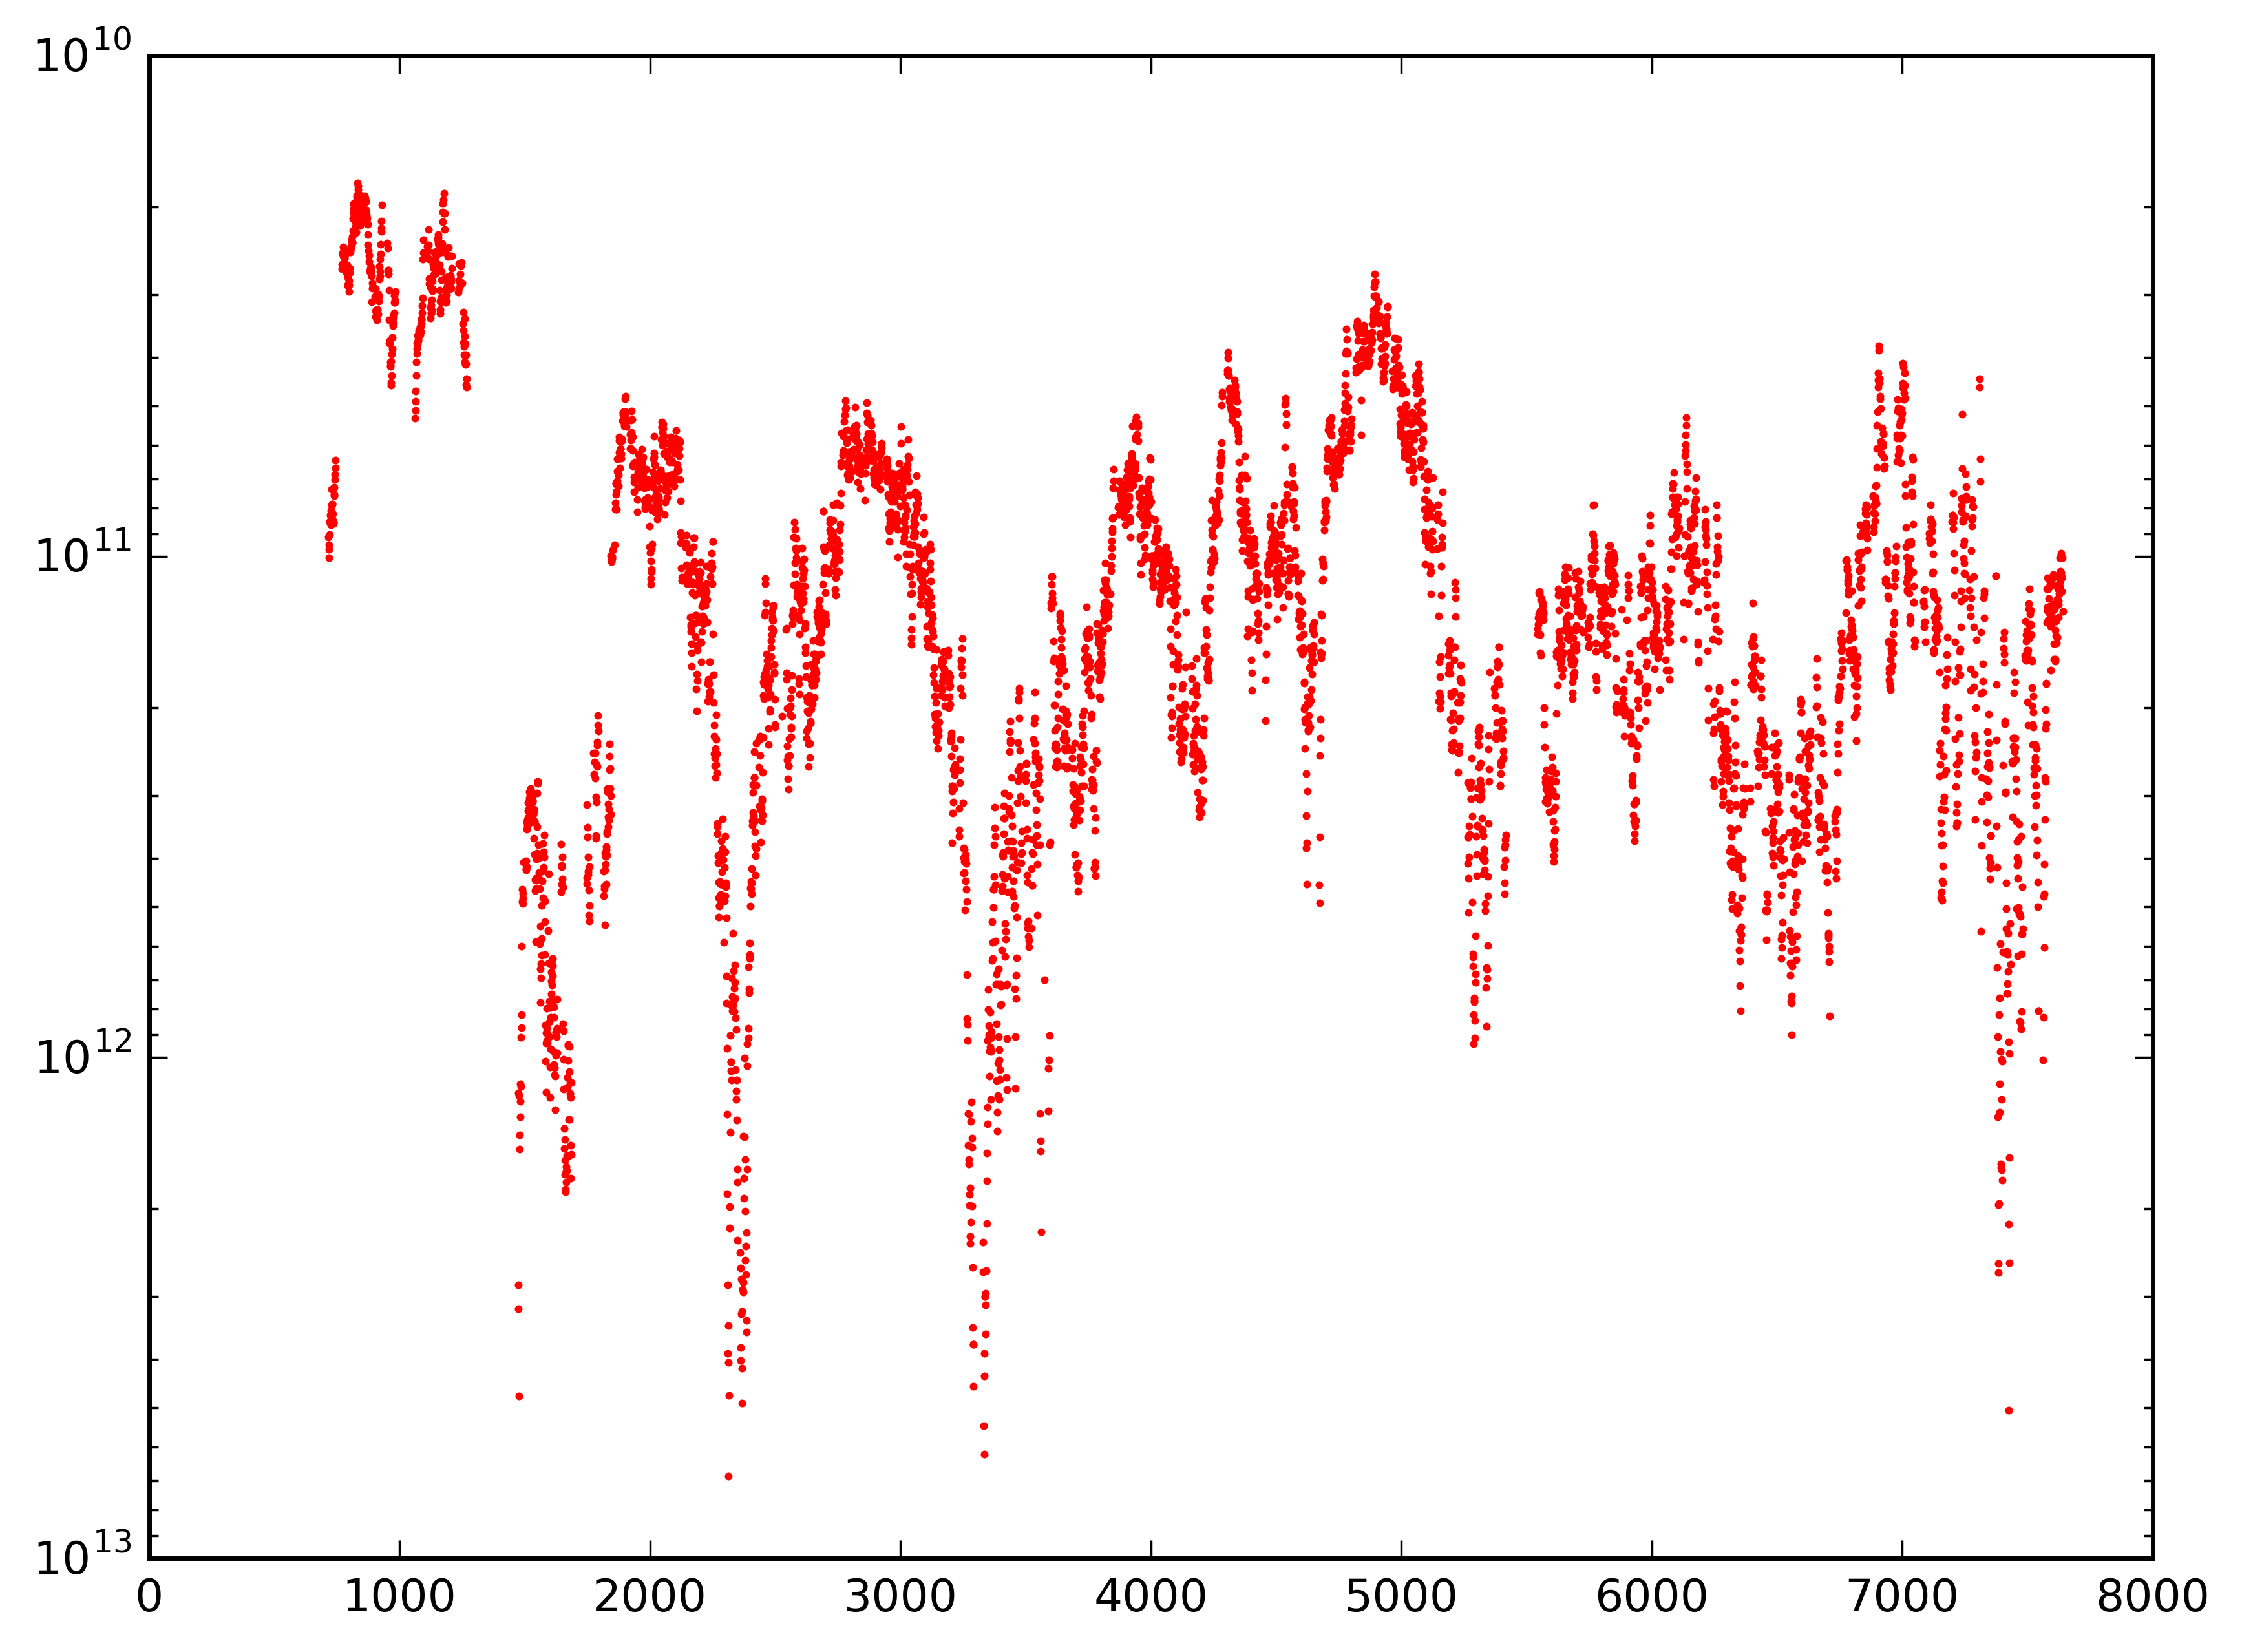

In [64]:
plt.figure(figsize=(8,6))
plt.scatter(hpd['orbit'],hpd['hp_den'],s=3,lw=0,c='r')
#plt.ylim(60,140)
plt.yscale('log')
plt.ylim(1.e+13,1.e+10)
plt.show()

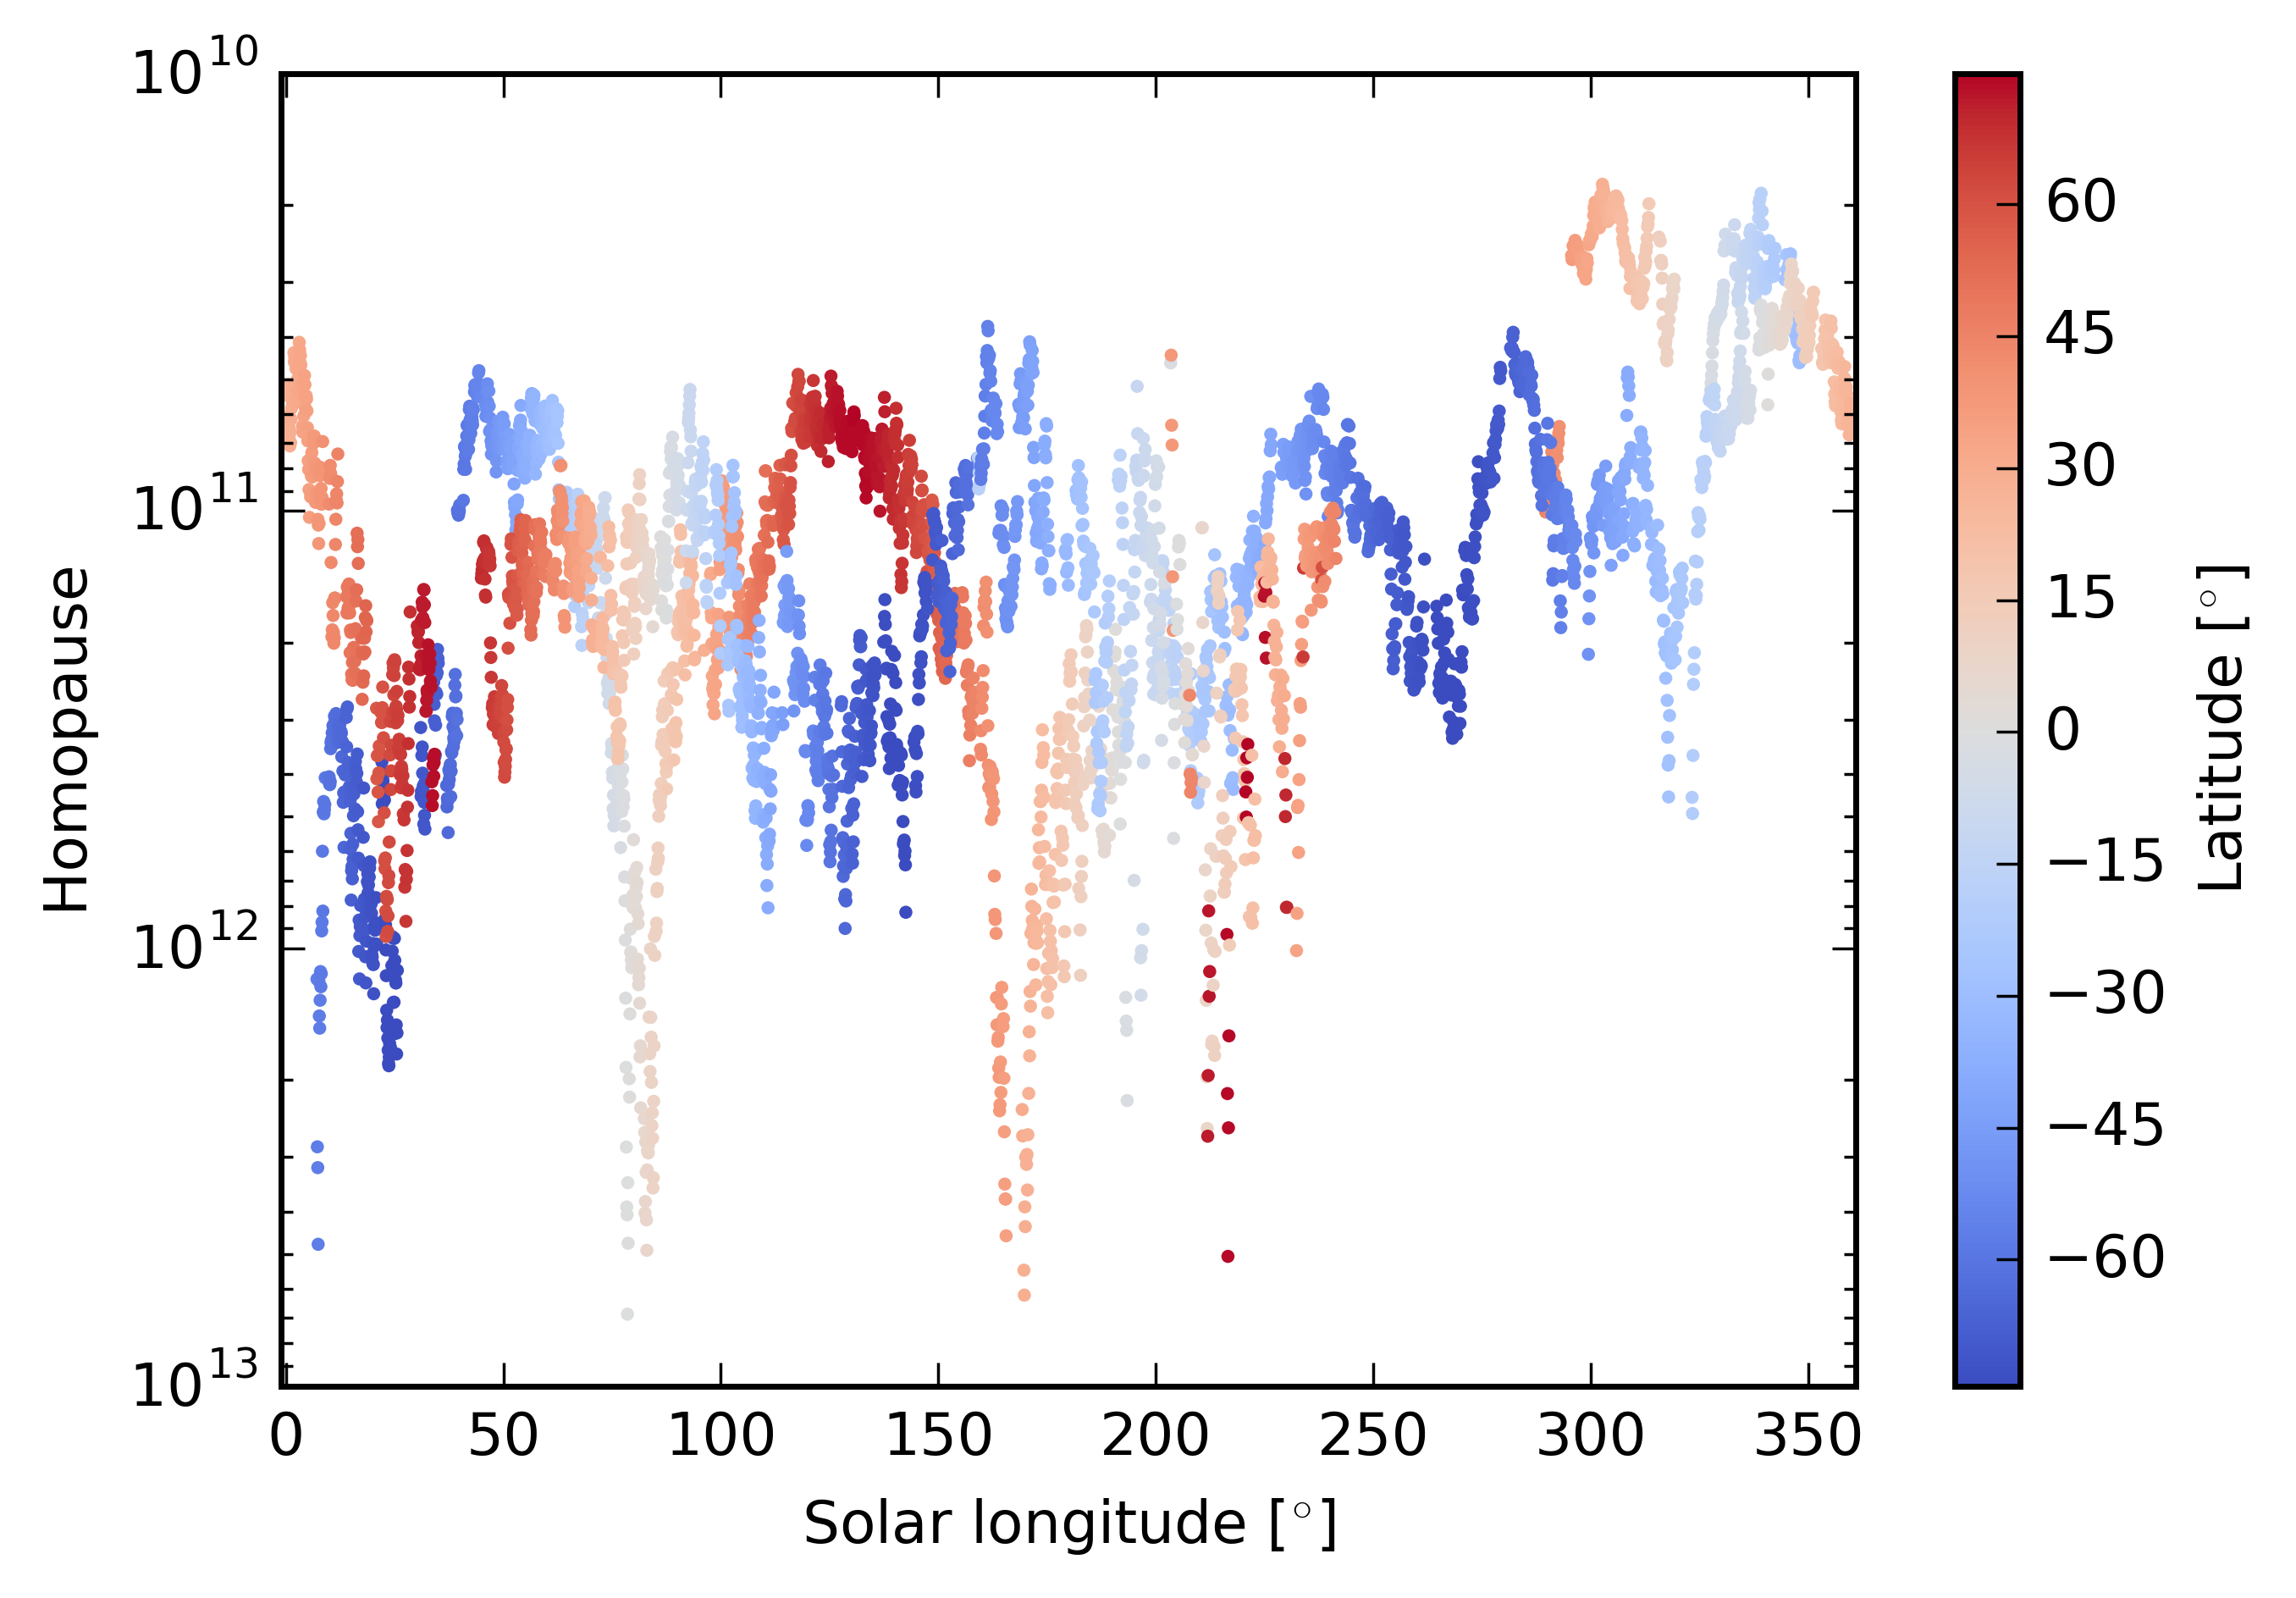

In [65]:
plt.figure()
cax = plt.scatter(hpd['Ls'],hpd['hp_den'],s=5,lw=0,c=hpd['lat'],cmap='coolwarm')
#plt.scatter(hp['Ls'][hp['lat']>0],hp['hp_alt'][hp['lat']>0],s=5,lw=0,c='r')
#plt.scatter(hp['Ls'][hp['lat']<0],hp['hp_alt'][hp['lat']<0],s=5,lw=0,c='b')

#plt.plot(Ls,Ls_alt,c='k',lw=2,ls='--')
plt.ylim(1.e+13,1.e+10)
plt.yscale('log')
plt.xlim(-1,361)
plt.xlabel(r'Solar longitude [$^{\circ}$]')
plt.ylabel('Homopause ')
plt.colorbar(cax,label=r'Latitude [$^{\circ}$]')

plt.show()

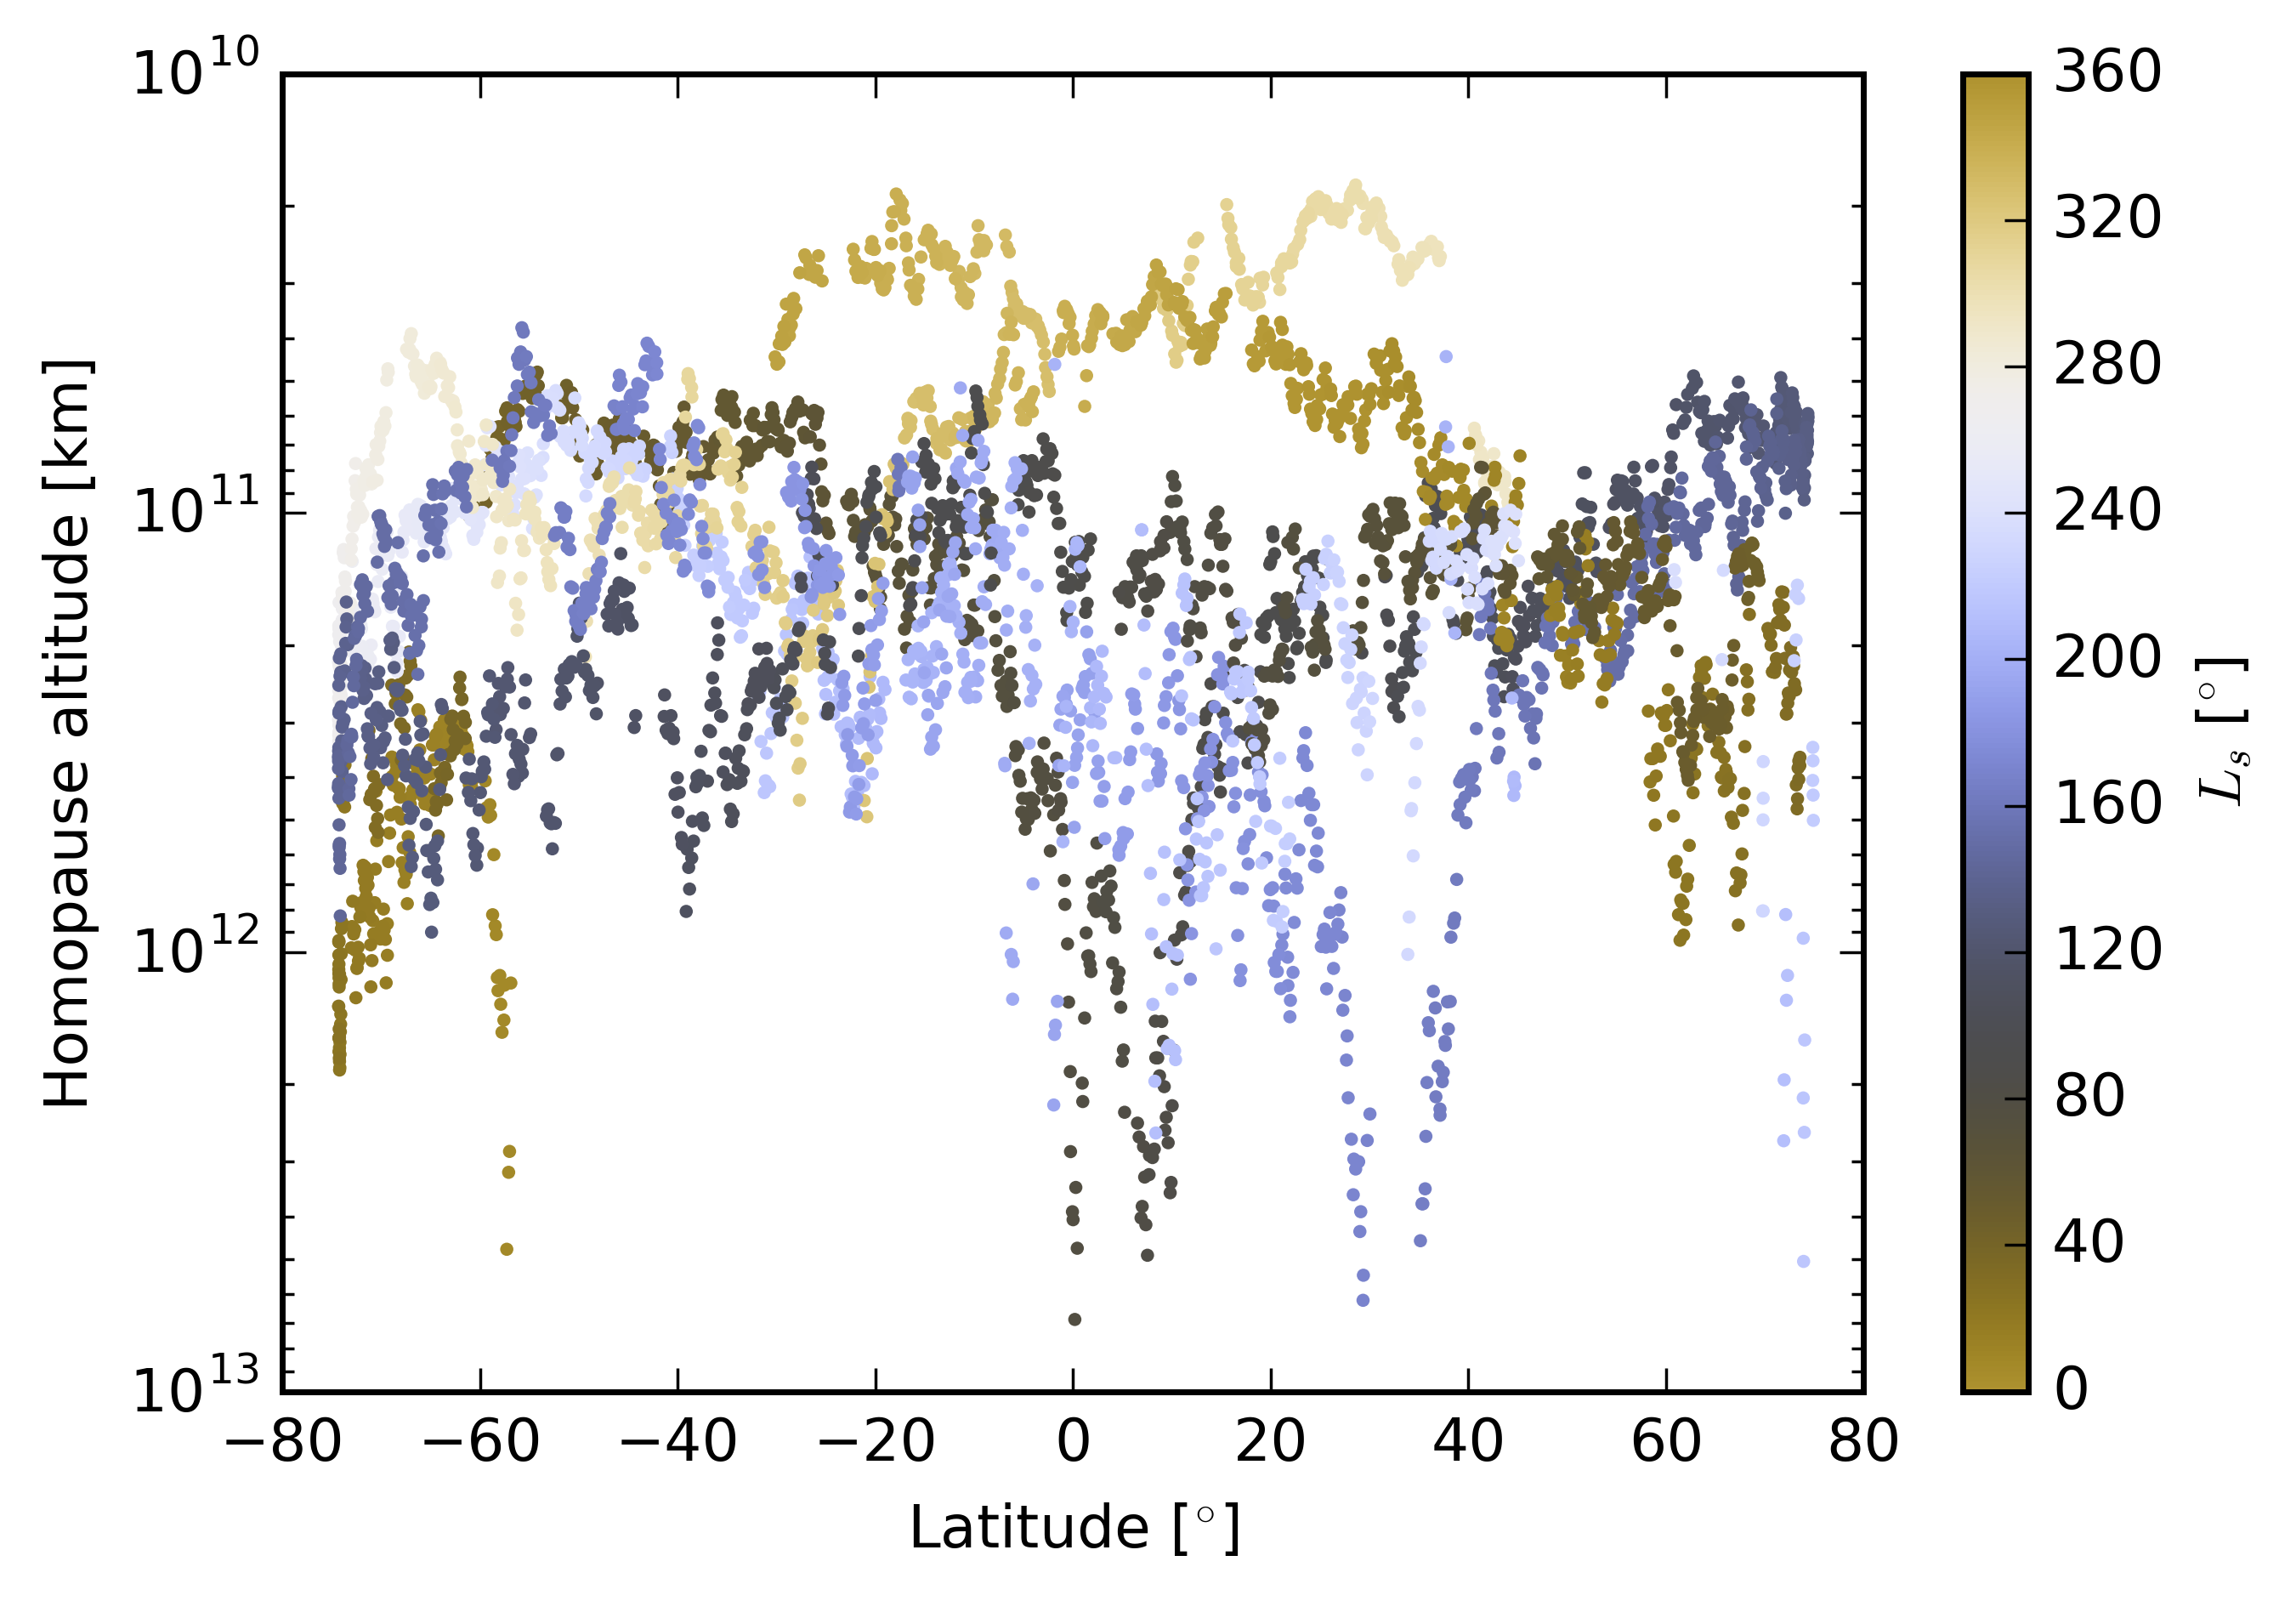

In [53]:
plt.figure()
cax = plt.scatter(hpd['lat'],hpd['hp_den'],s=5,lw=0,c=hpd['Ls'],cmap=cyclic,norm=LscNorm)
#plt.plot(lat_bin['lat_bin'],lat_bin['hp_alt'],c='k',lw=2,ls='--')
plt.xlim(-80,80)

plt.yscale('log')
plt.ylim(1.e+13,1.e+10)


plt.xlabel(r'Latitude [$^{\circ}$]')
plt.ylabel('Homopause altitude [km]')
plt.colorbar(cax,label=r'$L_s$ [$^{\circ}$]')

plt.show()

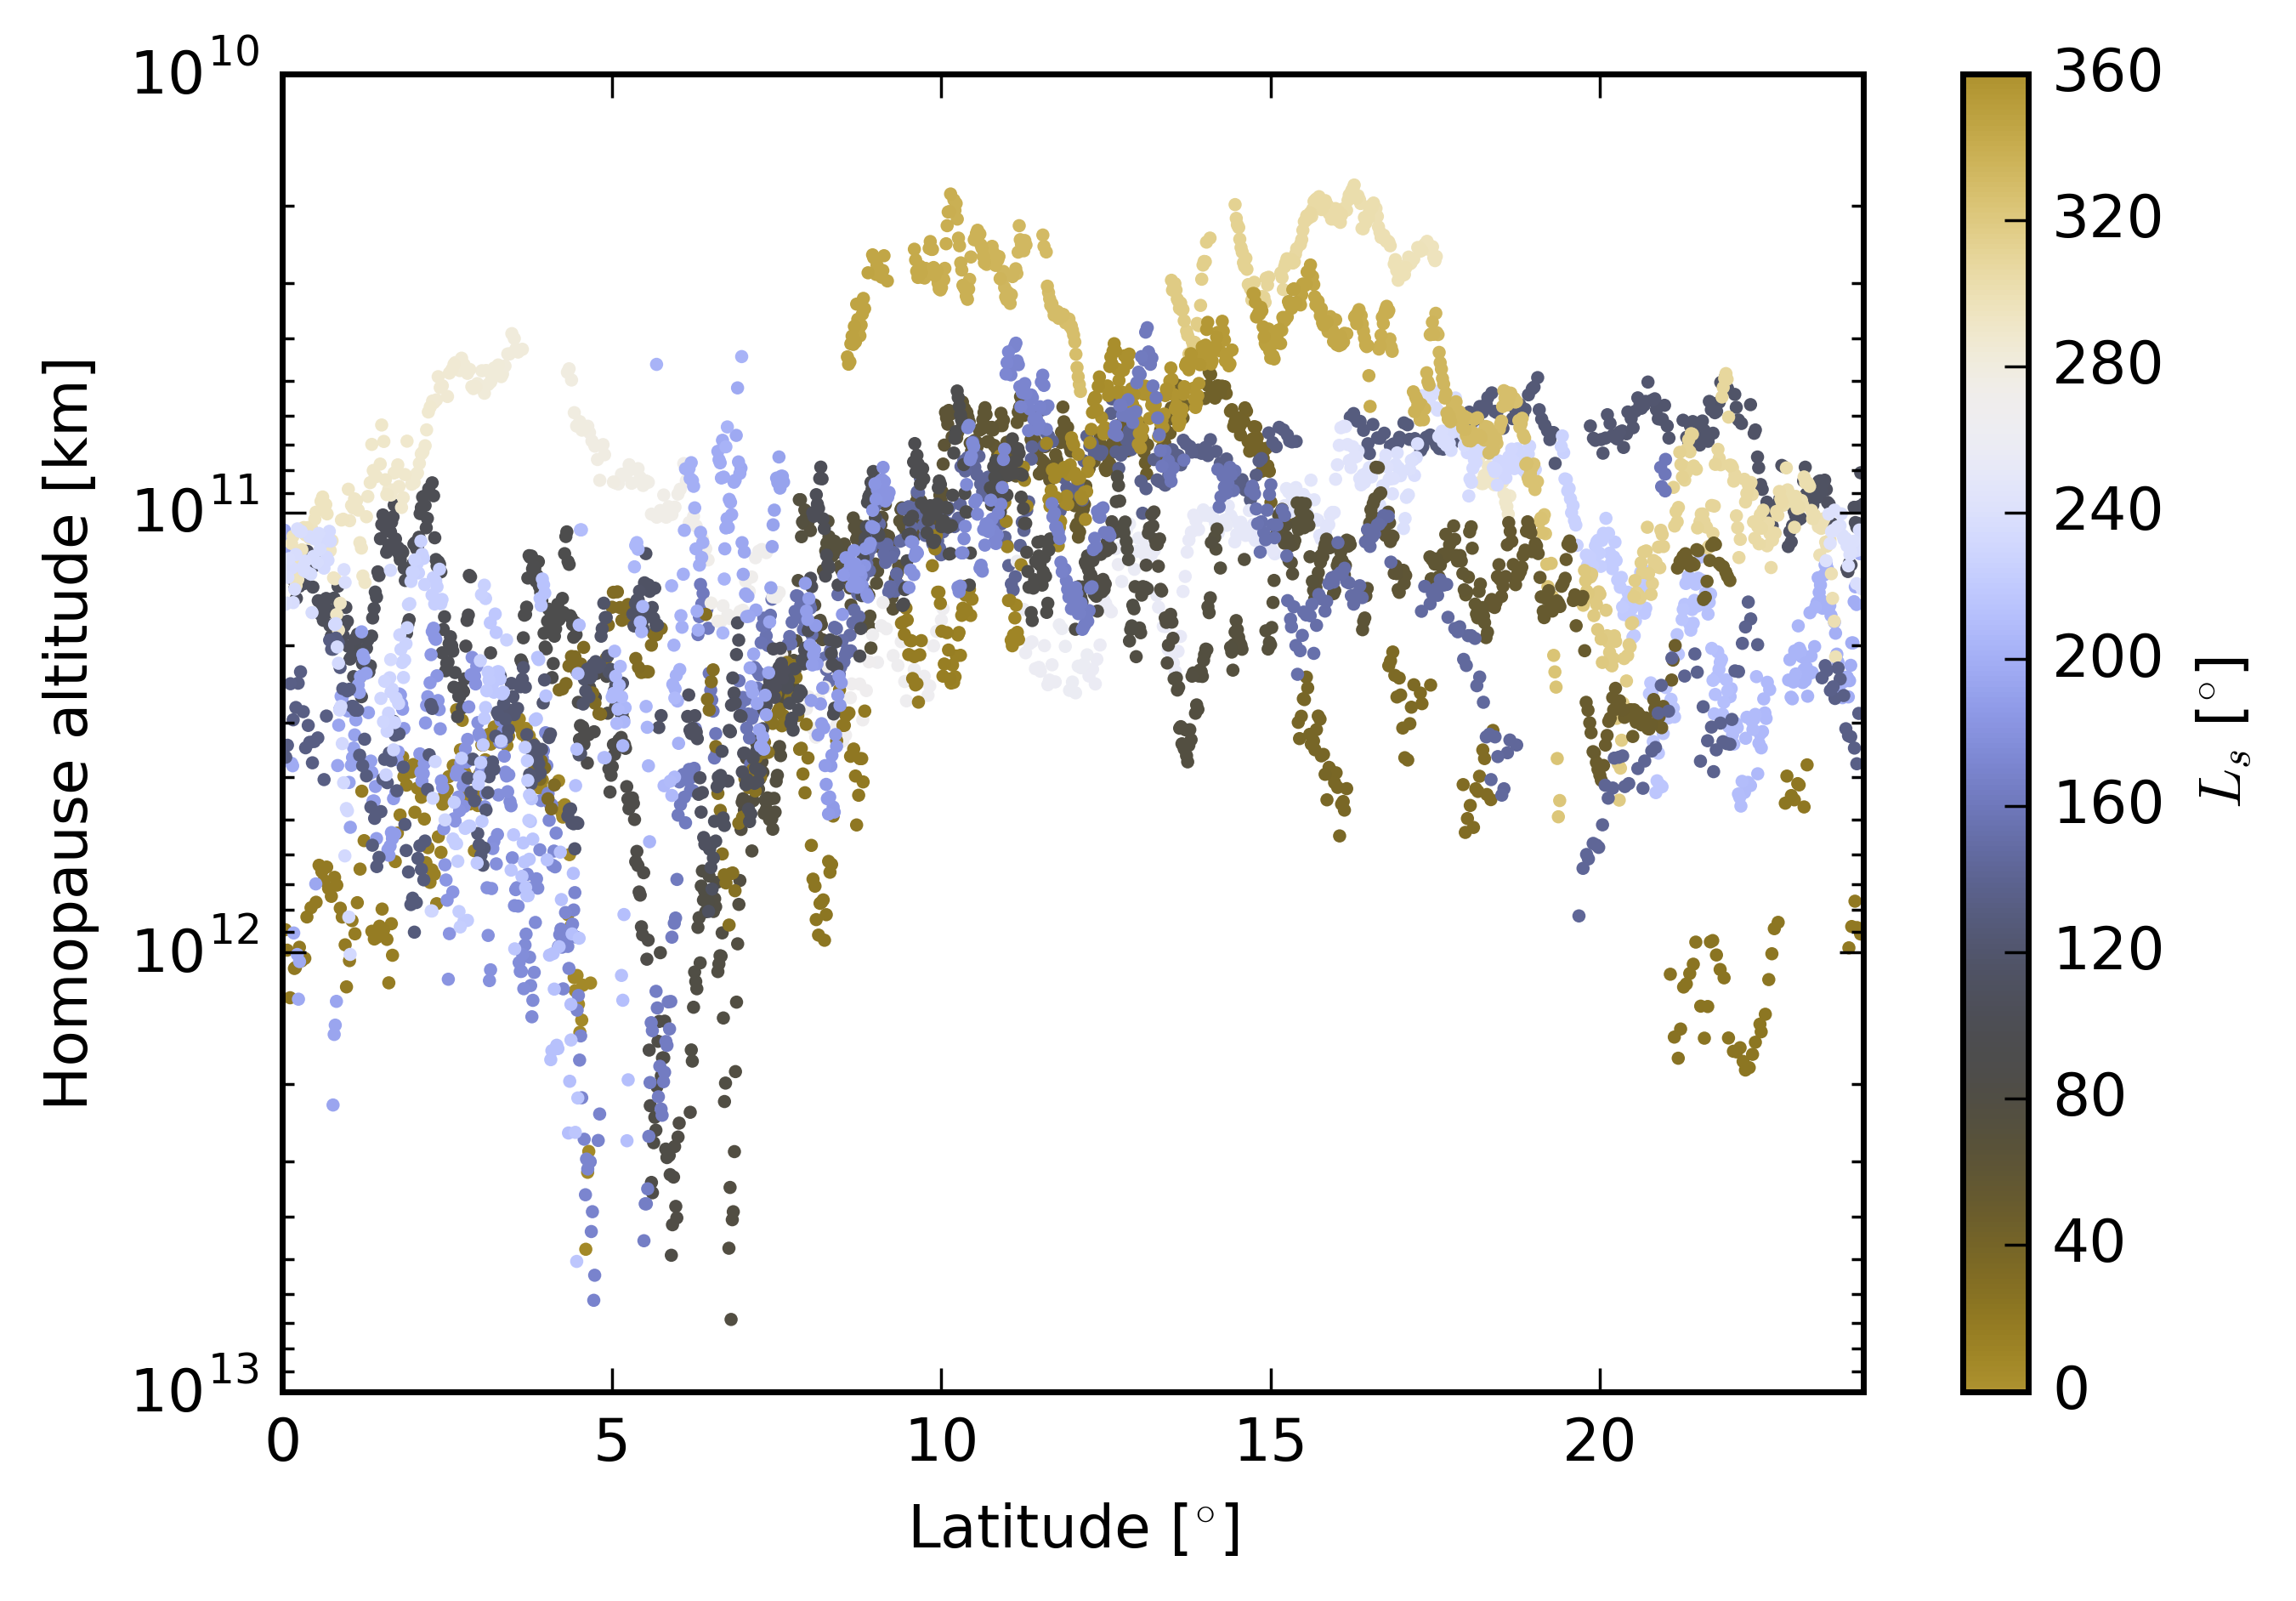

In [62]:
plt.figure()
cax = plt.scatter(hpd['lst'],hpd['hp_den'],s=5,lw=0,c=hpd['Ls'],cmap=cyclic,norm=LscNorm)
#plt.plot(lat_bin['lat_bin'],lat_bin['hp_alt'],c='k',lw=2,ls='--')
plt.xlim(0,24)

plt.yscale('log')
plt.ylim(1.e+13,1.e+10)


plt.xlabel(r'Latitude [$^{\circ}$]')
plt.ylabel('Homopause altitude [km]')
plt.colorbar(cax,label=r'$L_s$ [$^{\circ}$]')

plt.show()

In [14]:
#WT = [116,111,116,85,96,85,98,117,140,112,114]
mo1 = ['20150201','20150301','20150401','20150501','20150701','20150801','20150901',
           '20151001','20151101','20151201','20160101','20160201','20160301',
           '20160401','20160501','20160601','20160701','20160801','20160901',
           '20161001']
middate = ['20150215','20150315','20150415','20150515','20150715','20150815','20150915',
           '20151015','20151115','20151215','20160115','20160215','20160315',
           '20160415','20160515','20160615','20160715','20160815','20160915',
           '20161015']
WT = [np.nan,np.nan,np.nan,np.nan,107,np.nan,np.nan,np.nan,np.nan,np.nan,
      82,np.nan,np.nan,np.nan,np.nan,90,116,97,np.nan,np.nan]
WT_ok = [134,np.nan,117,np.nan,np.nan,115,99,np.nan,np.nan,124,np.nan,np.nan,np.nan,np.nan,
         np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]
WT_lo = [np.nan,107,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,122,np.nan,np.nan,np.nan,np.nan,
        np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]

Dissip = [199,221,213,213,176,176,191,199,186,170,176,186,205,206,191,165,165,178,212,227]
KD = [169,176,184,184,154,154,169,162,161,147,147,154,169,176,162,147,147,154,176,191]
print len(WT),len(WT_ok),len(WT_lo),len(Dissip),len(KD),len(middate)

Stds70 = [6.9, 5.9, 5.7, 6.2, 8.2, 7.2, 10.5, 6.2, 5.9, 8.1, 11.9, 7.9, 8.1, \
          7.6, 6.6, 8.1, 9.2, 7.5, 5.5, 4.3]
Temp70 = [150.0,154.3,160.0,152.4,142.6,143.3,132.8,137.6,130.0,131.9,139.3,\
          137.1,145.1,152.2,160.5,138.1,140.7,144.8,154.7,165.1]

#middate1 = ['20150715','20160115','20160615','20160715','20160815']

WTdf = pd.DataFrame({'WT':WT,'month':middate,'Dissip':Dissip,'KD':KD,'WT_ok':WT_ok,'WT_lo':WT_lo,'stds':Stds70,'month_first':mo1,'temp':Temp70})
WTdf['date'] = pd.to_datetime(WTdf['month'])
WTdf['mo1'] = pd.to_datetime(WTdf['month_first'])
WTdf = WTdf.set_index('mo1')
WTdf = WTdf.sort_index()


20 20 20 20 20 20


In [82]:
hp_den['dt'] = pd.tseries.tools.to_datetime(hp_den['t_utc'],infer_datetime_format=True)

In [49]:
hp_den = hp_den[hp_den['dt']<dt.datetime(2016,12,1)]

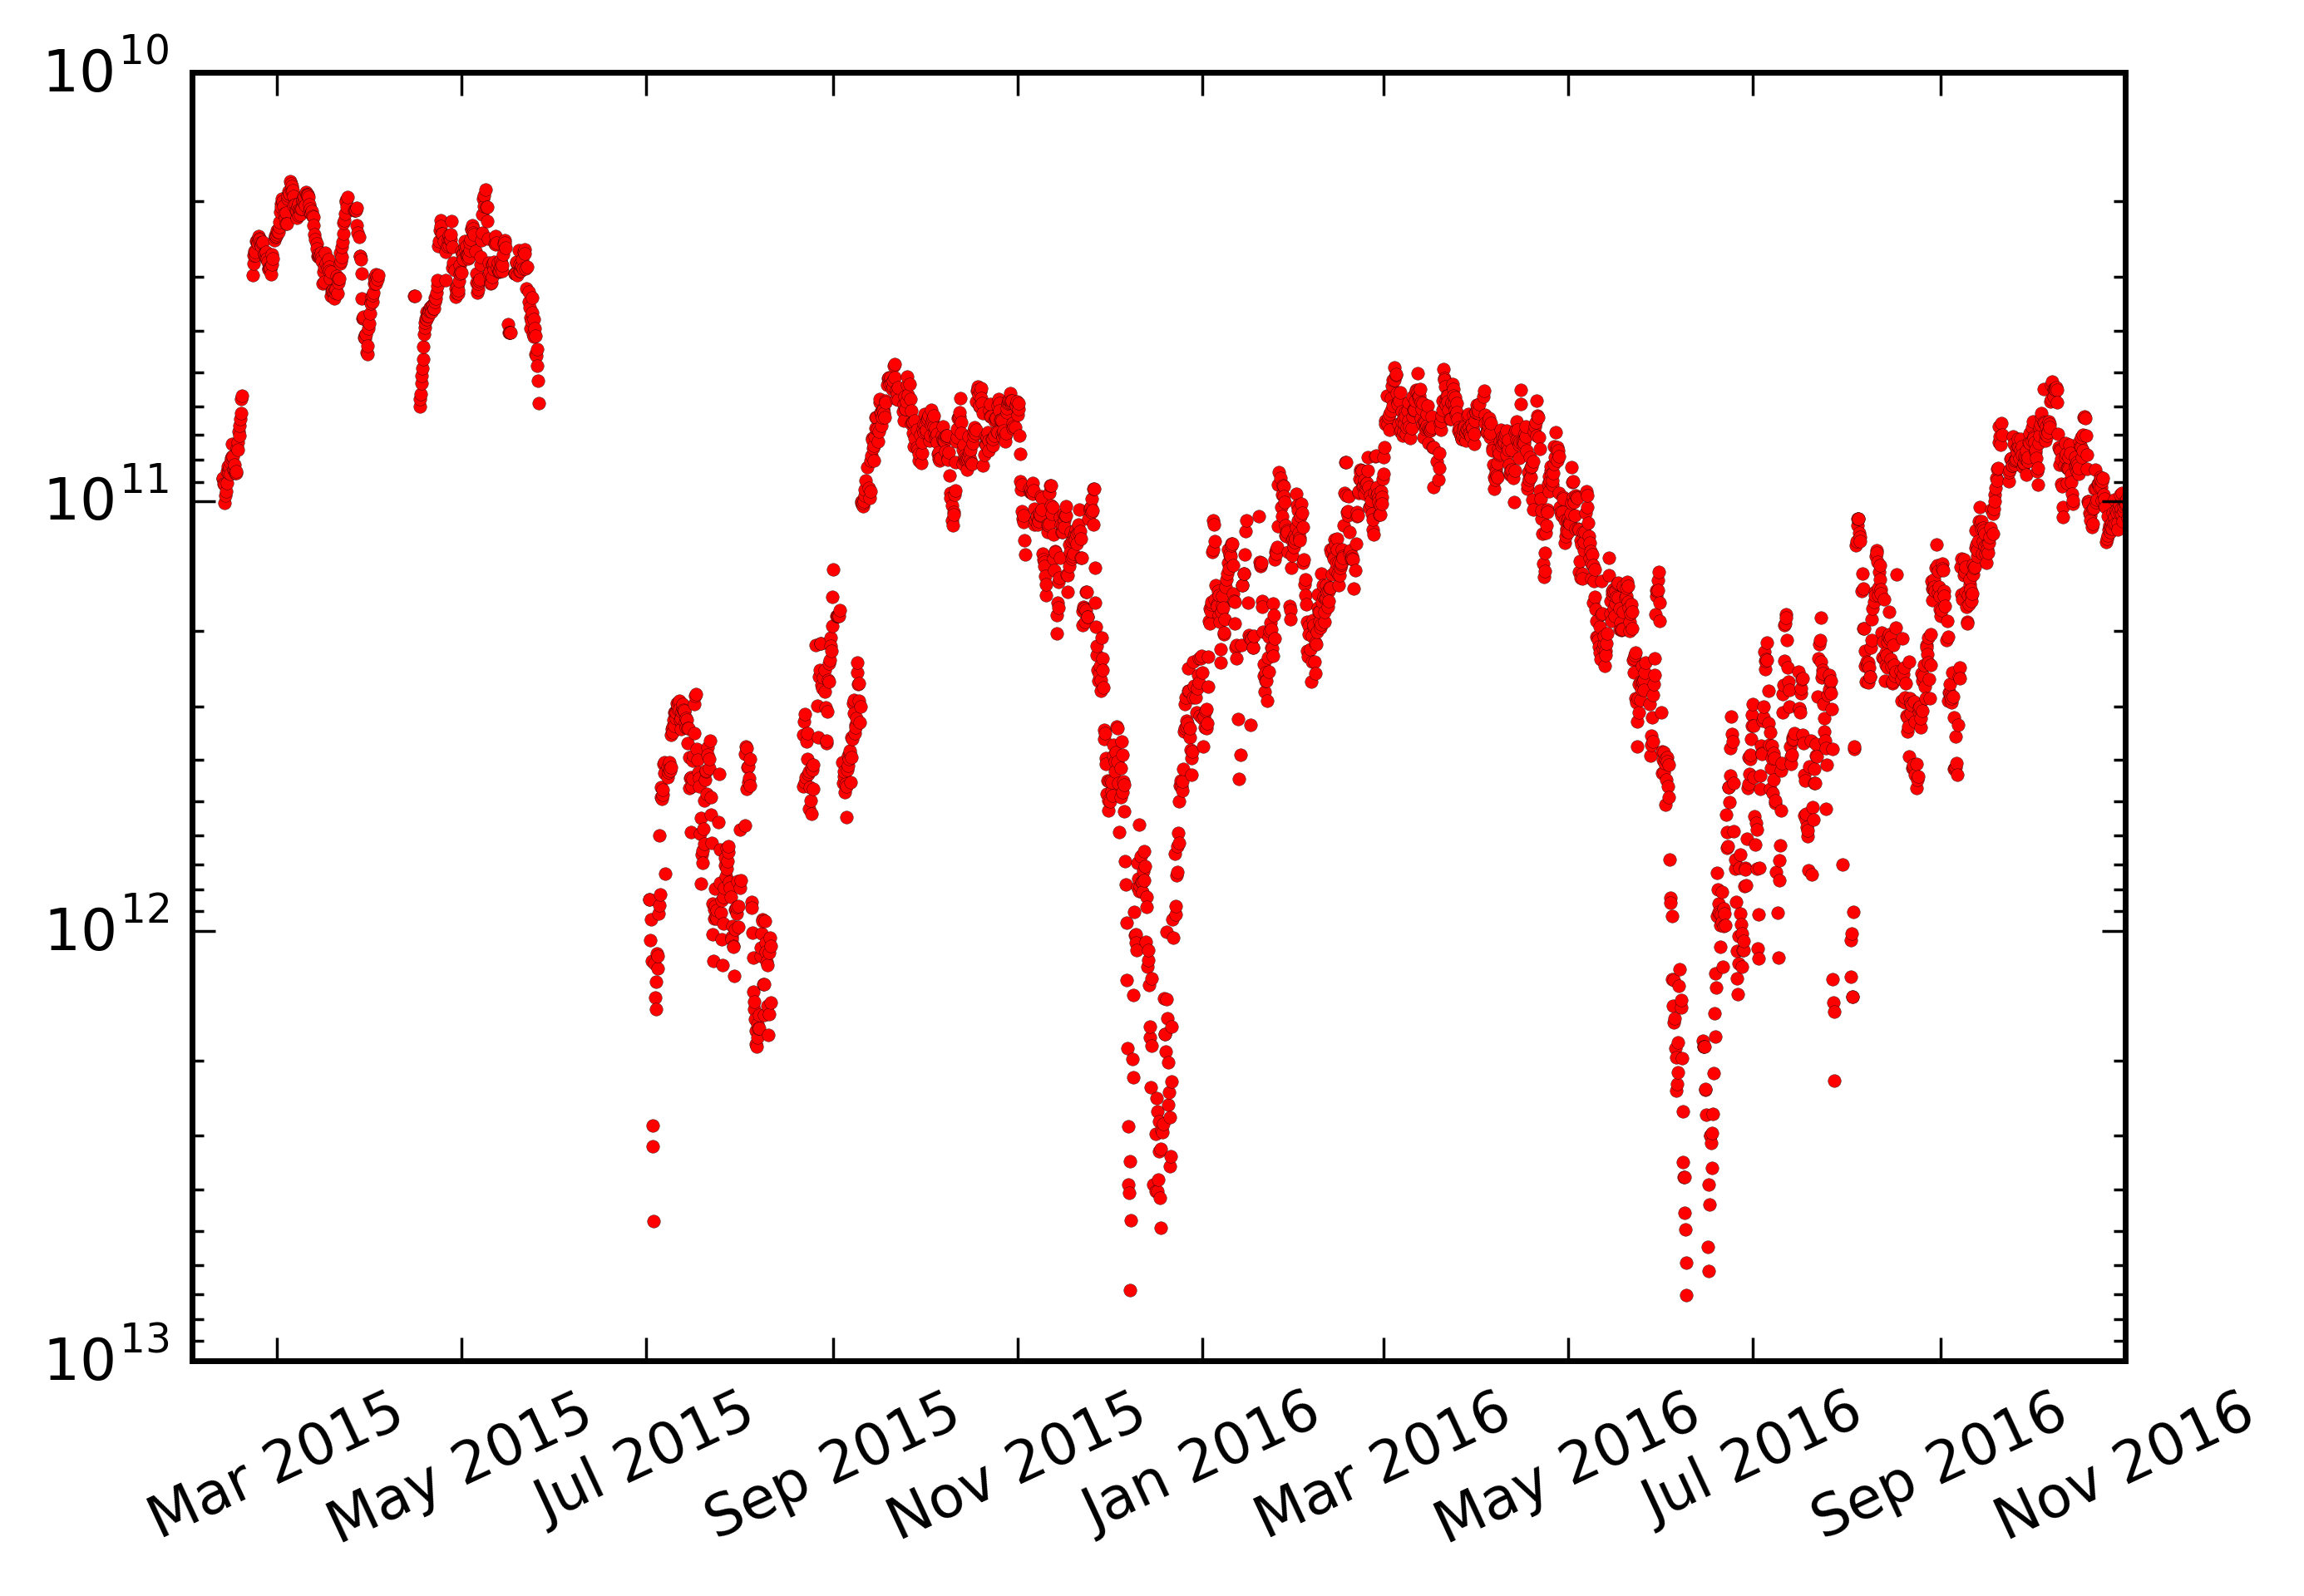

In [60]:
plt.figure()
plt.scatter(list(hp_den['dt']),hp_den['hp_den'],s=5,lw=0.05,c='red')

plt.yscale('log')
plt.ylim(1.e+13,1.e+10)
plt.setp(plt.gca().xaxis.get_majorticklabels(), rotation=25, horizontalalignment='center')

#ax0t = plt.twinx()
#ax0t.plot(WTdf.index,WTdf['stds'],color='b',marker='s',alpha=0.5,lw=1,zorder=-10)
#ax0t.set_ylim(12,4)
#ax0t.set_ylabel('Standard Deviation (K)')

plt.xlim(dt.datetime(2015,2,1),dt.datetime(2016,11,1))



plt.savefig('../../Desktop/AGU_hp.png',dpi=400)
plt.show()

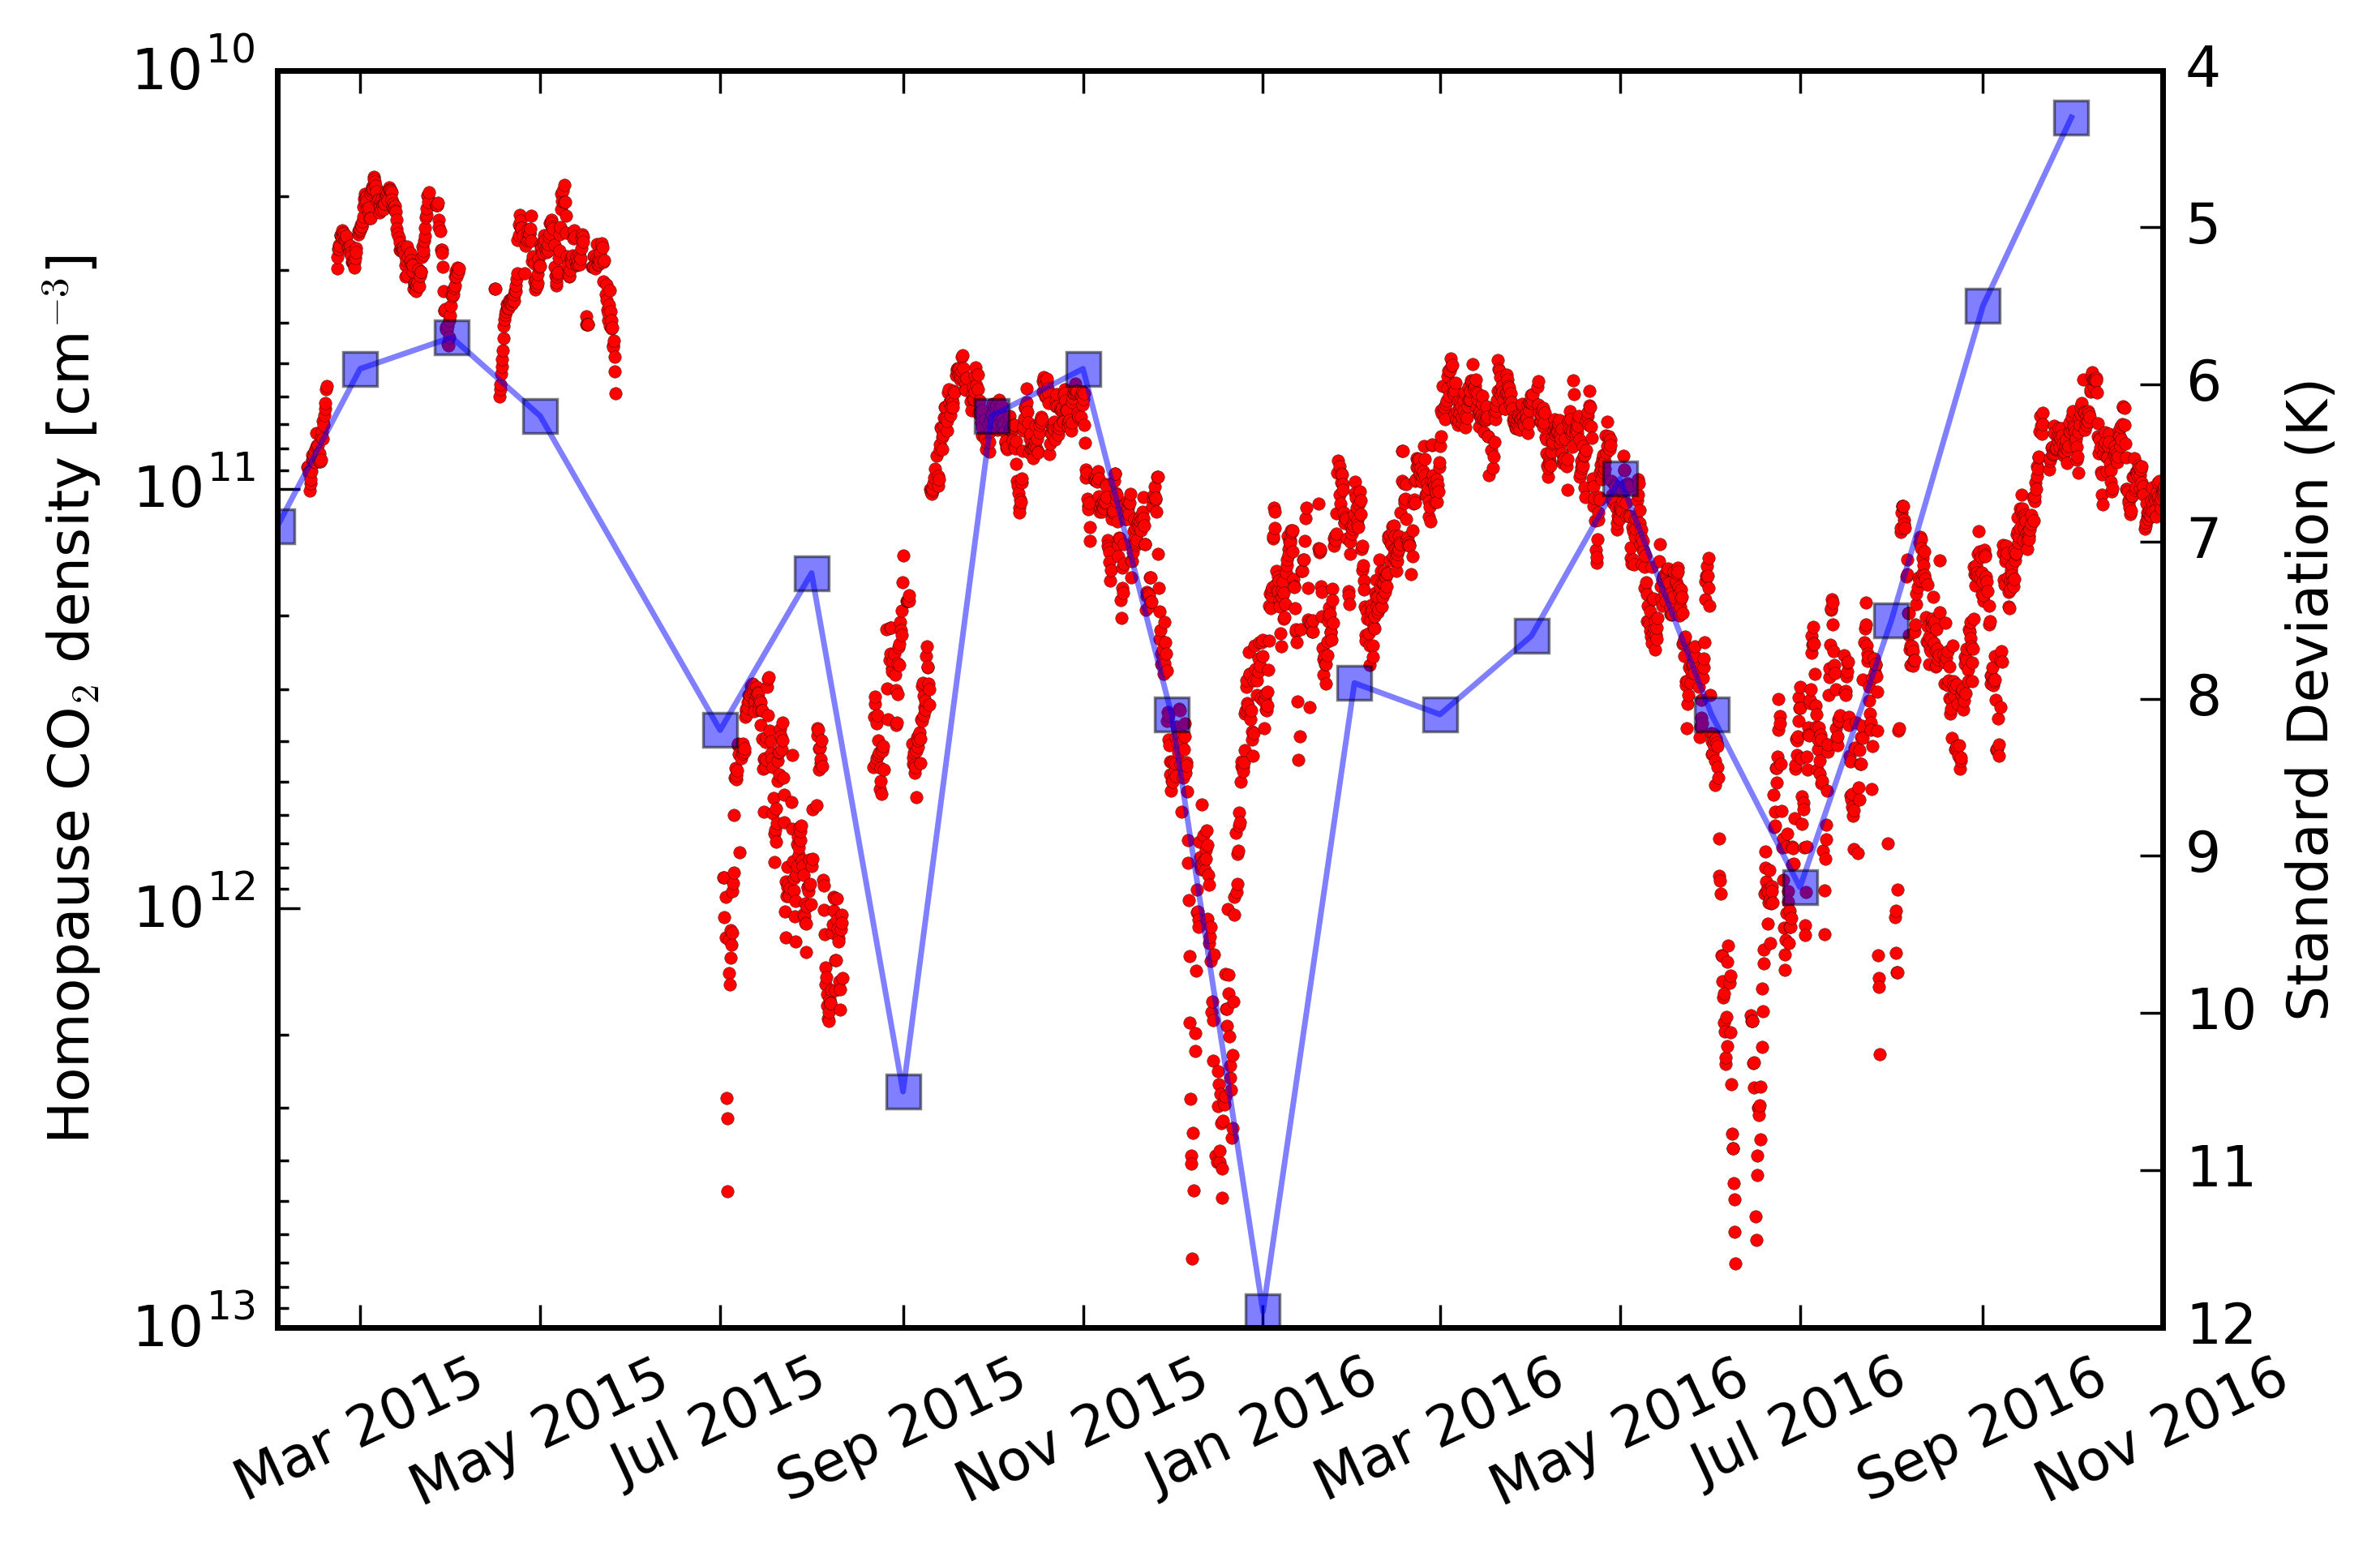

In [84]:
plt.figure()
plt.scatter(list(hp_den['dt']),hp_den['hp_den'],s=5,lw=0.05,c='red')

plt.yscale('log')
plt.ylim(1.e+13,1.e+10)
plt.ylabel(r'Homopause CO$_2$ density [cm$^{-3}$]')


plt.setp(plt.gca().xaxis.get_majorticklabels(), rotation=25, horizontalalignment='center')


ax0t = plt.twinx()
ax0t.plot(WTdf.index,WTdf['stds'],color='b',marker='s',alpha=0.5,lw=1,zorder=-10)
ax0t.set_ylim(12,4)
ax0t.set_ylabel('Standard Deviation (K)')

plt.xlim(dt.datetime(2015,2,1),dt.datetime(2016,11,1))


plt.savefig('../../Desktop/AGU_hpStd.png',dpi=400)
plt.show()

In [69]:
Lsbins = np.linspace(0,360,12)
Lsbin_mids = (Lsbins[:-1]+Lsbins[1:])/2
Lsb = pd.cut(hp_den['Ls'],Lsbins,labels=Lsbin_mids)
Ls_bin = hp_den.drop('Ls',axis=1).groupby(Lsb).median().reset_index()
Ls = list(Ls_bin['Ls'])
Ls_alt = list(Ls_bin['hp_den'])
Ls_std = hp_den['hp_den'].groupby(Lsb).std().reset_index()['hp_den']

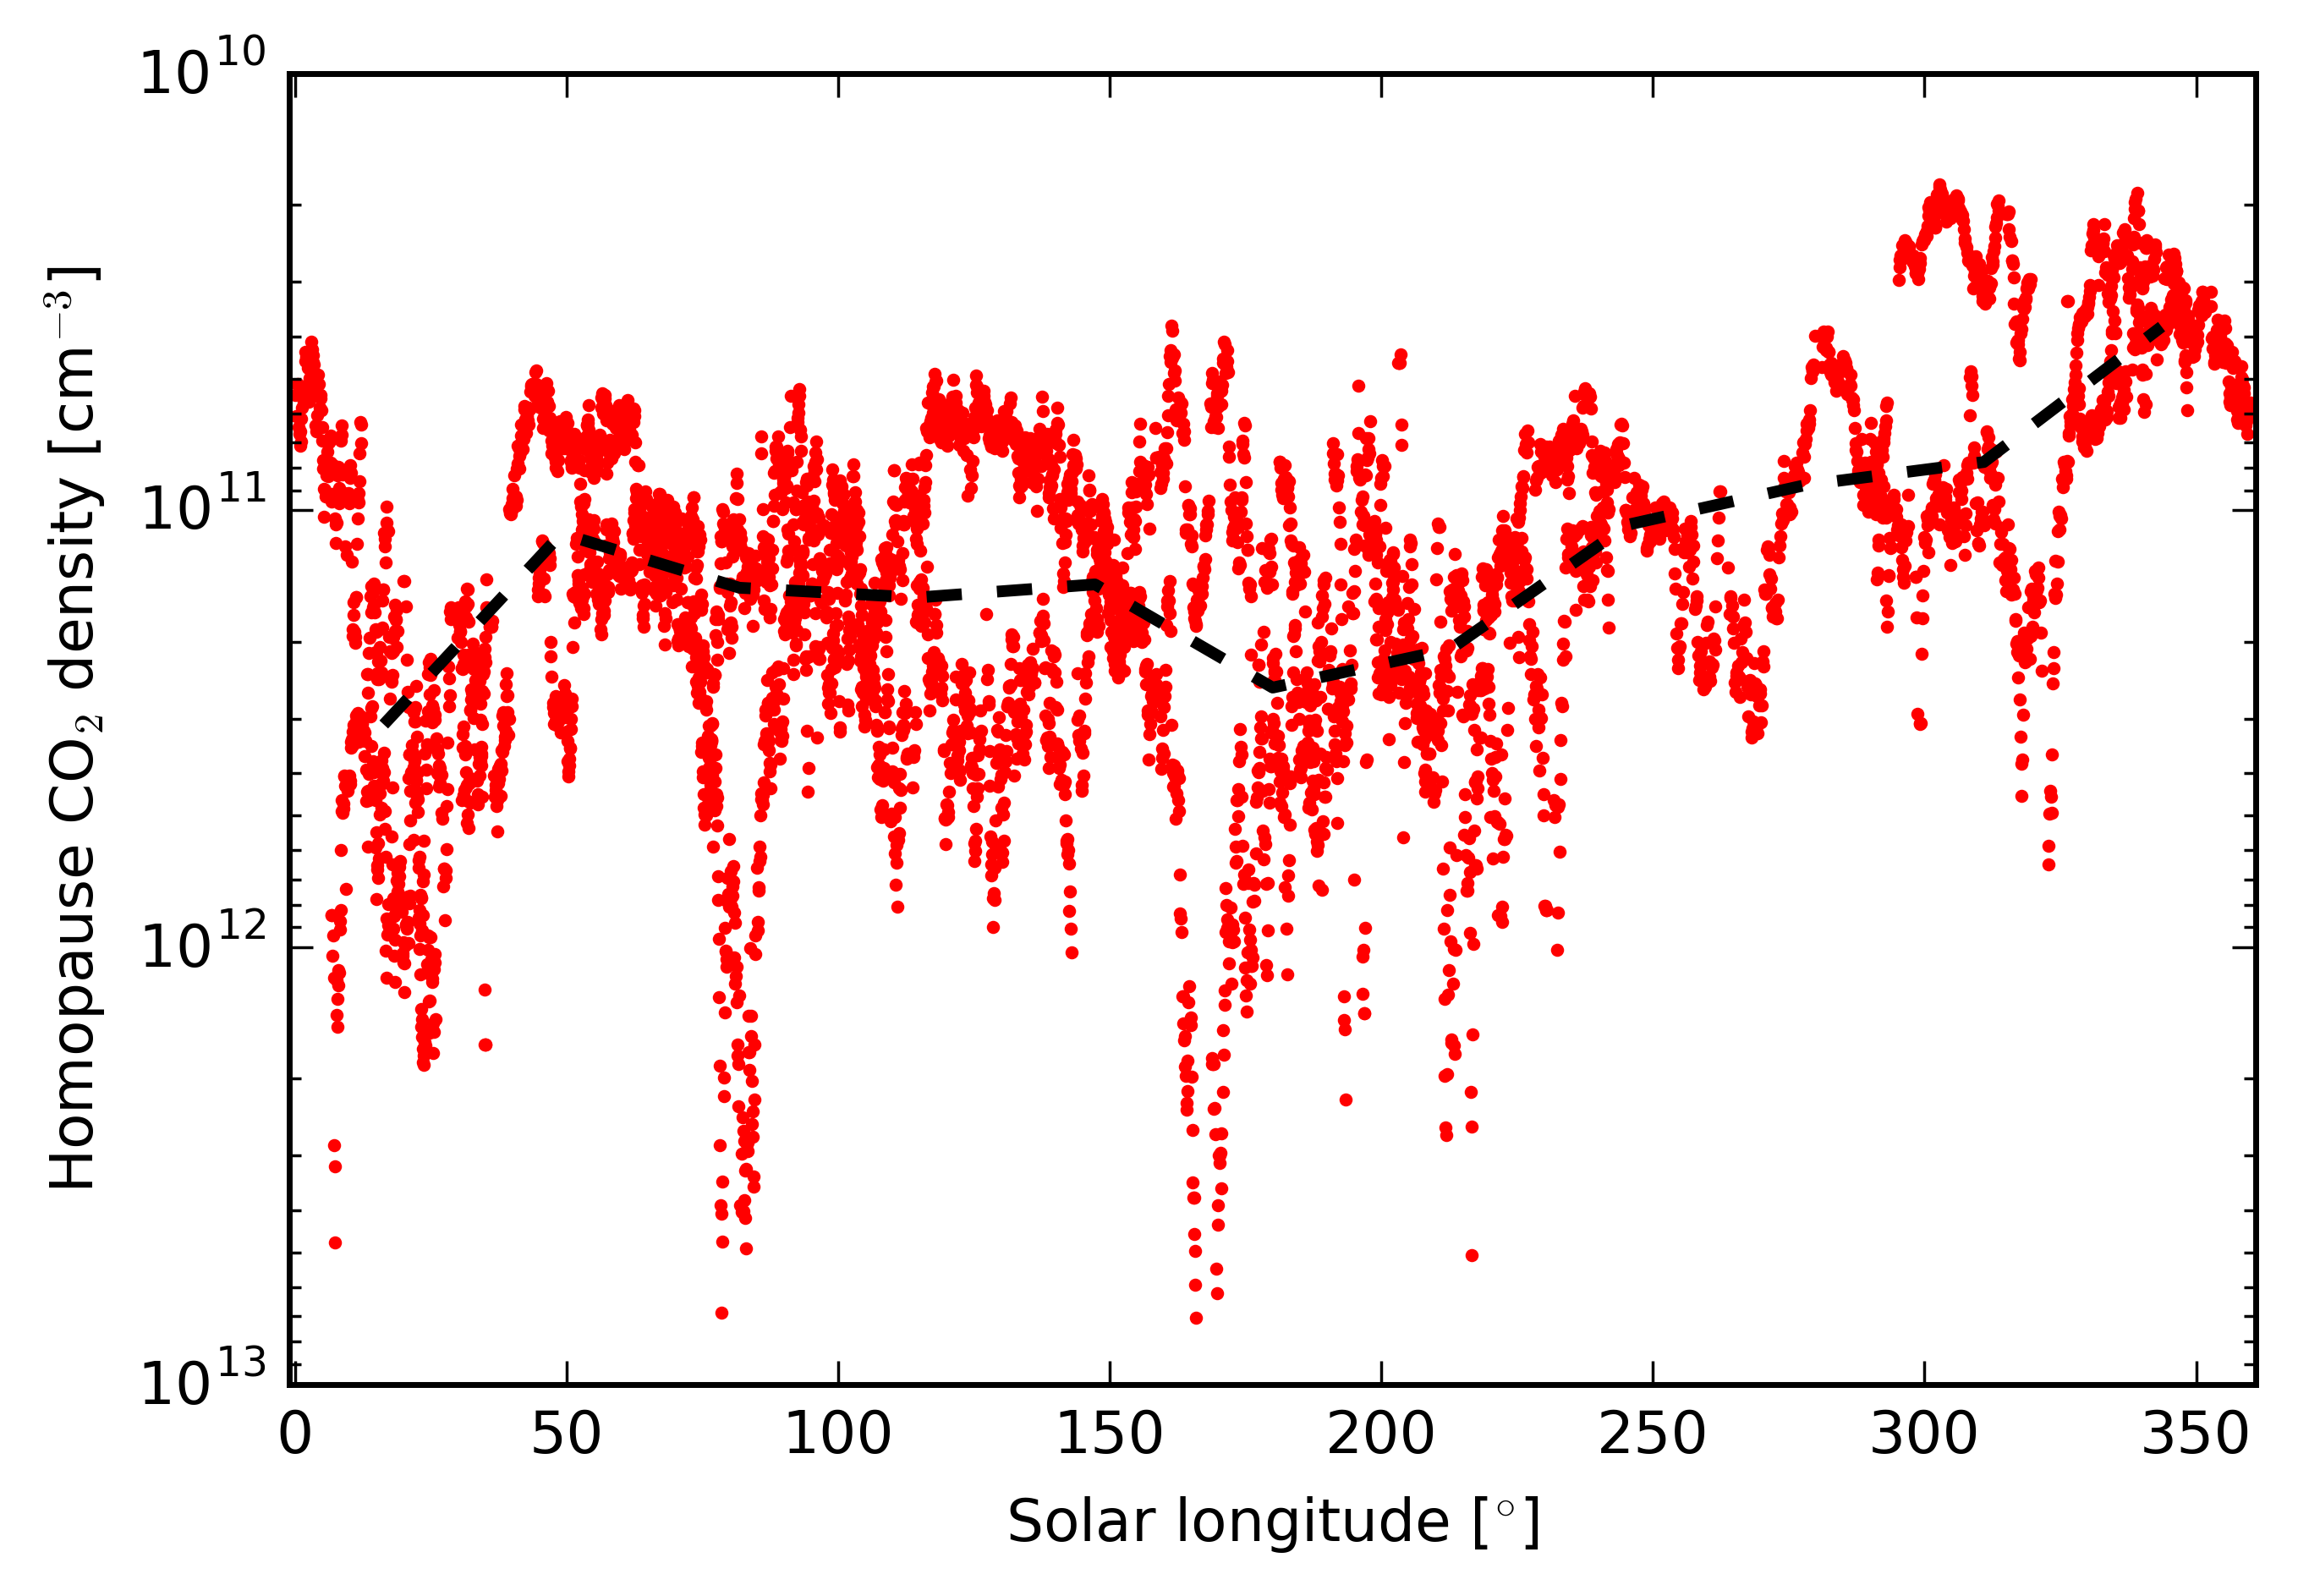

In [80]:
fig, ax = plt.subplots()
cax = ax.scatter(hp_den['Ls'],hp_den['hp_den'],s=5,lw=0,c='r')#c=hp_den['lat'],cmap='coolwarm')
#plt.scatter(hp['Ls'][hp['lat']>0],hp['hp_alt'][hp['lat']>0],s=5,lw=0,c='r')
#plt.scatter(hp['Ls'][hp['lat']<0],hp['hp_alt'][hp['lat']<0],s=5,lw=0,c='b')

ax.plot(Ls,Ls_alt,c='k',lw=2,ls='--')
ax.set_yscale('log')
ax.set_ylim(1.e+13,1.e+10)
#plt.ylim(60,140)
ax.set_xlim(-1,361)
ax.set_xlabel(r'Solar longitude [$^{\circ}$]')
ax.set_ylabel(r'Homopause CO$_2$ density [cm$^{-3}$]')
#plt.colorbar(cax,label=r'Latitude [$^{\circ}$]')

plt.savefig('../../Desktop/AGU_Ls.png',dpi=400)
plt.show()

In [94]:
hp_den[['orbit','dt','Ls']][150:200]

orbit                  dt          Ls
150    891 2015-03-16 15:14:34  309.211448
151    892 2015-03-16 19:45:34  309.321458
152    893 2015-03-17 00:16:29  309.431402
153    894 2015-03-17 04:47:30  309.541355
154    898 2015-03-17 22:51:19  309.980743
155    899 2015-03-18 03:22:14  310.090494
156    900 2015-03-18 07:53:14  310.200247
157    901 2015-03-18 12:24:09  310.309935
158    902 2015-03-18 16:55:08  310.419617
159    903 2015-03-18 21:26:03  310.529240
160    904 2015-03-19 01:57:00  310.638844
161    905 2015-03-19 06:27:58  310.748422
162    906 2015-03-19 10:58:55  310.857962
163    907 2015-03-19 15:29:49  310.967449
164    908 2015-03-19 20:00:45  311.076917
165    909 2015-03-20 00:31:40  311.186346
166    910 2015-03-20 05:02:34  311.295736
167    911 2015-03-20 09:33:31  311.405114
168    912 2015-03-20 14:04:23  311.514426
169    913 2015-03-20 18:35:21  311.623746
170    915 2015-03-21 03:37:08  311.842227
171    916 2015-03-21 08:08:03  311.951430
172    917 2015-03-21 12:38:59  312.060606
173    918 2015-03-21 17:09:53  312.169737
174    919 2015-03-21 21:40:47  312.278834
175    920 2015-03-22 02:11:40  312.387893
176    921 2015-03-22 06:42:33  312.496919
177    922 2015-03-22 11:13:29  312.605933
178    923 2015-03-22 15:44:18  312.714867
179    924 2015-03-22 20:15:15  312.823822
180    925 2015-03-23 00:46:07  312.932711
181    926 2015-03-23 05:17:00  313.041574
182    927 2015-03-23 09:47:55  313.150417
183    928 2015-03-23 14:18:47  313.259208
184    929 2015-03-23 18:49:42  313.367986
185    930 2015-03-23 23:20:35  313.476718
186    931 2015-03-24 03:51:27  313.585411
187    932 2015-03-24 08:22:22  313.694091
188    945 2015-03-26 19:03:34  315.103653
189    946 2015-03-26 23:34:27  315.211859
190    947 2015-03-27 04:05:15  315.319998
191    948 2015-03-27 08:36:05  315.428118
192    949 2015-03-27 13:06:58  315.536225
193    950 2015-03-27 17:37:45  315.644259
194    953 2015-03-28 07:10:15  315.968222
195    954 2015-03-28 11:41:07  316.076157
196    955 2015-03-28 16:12:04  316.184092
197    956 2015-03-28 20:43:10  316.292054
198    957 2015-03-29 01:14:16  316.399982
199    958 2015-03-29 05:45:20  316.507864